In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_score


import xgboost as xgb
from xgboost.sklearn import XGBRegressor

import xgboost as xg 
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.linear_model import LinearRegression
# Feature Importance 
import shap

In [2]:
pisa2018_japan = pd.read_csv('datasets/pisa2018_japan.csv')

In [3]:
pisa2018_japan.head()

CNTRYID    CNTSCHID    CNTSTUID                              STRATUM  \
0   Japan  39200001.0  39200462.0  JPN - stratum 01: Public & Academic   
1   Japan  39200001.0  39200850.0  JPN - stratum 01: Public & Academic   
2   Japan  39200001.0  39200893.0  JPN - stratum 01: Public & Academic   
3   Japan  39200001.0  39201063.0  JPN - stratum 01: Public & Academic   
4   Japan  39200001.0  39201234.0  JPN - stratum 01: Public & Academic   

   EFFORT1  EFFORT2                         OCOD1  \
0      9.0     10.0  Secondary education teachers   
1      6.0      8.0         General office clerks   
2      8.0      8.0                       Missing   
3      8.0     10.0            Office supervisors   
4      6.0      6.0         Shop sales assistants   

                                               OCOD2                   OCOD3  \
0            Managing directors and chief executives  Teaching professionals   
1  Vague(a good job, a quiet job, a well paid job...      Office supervisors   
2                                              Cooks                 Missing   
3  Vague(a good job, a quiet job, a well paid job...             Pharmacists   
4  Vague(a good job, a quiet job, a well paid job...     Building architects   

   GRADE  ...                   UNIT WVARSTRR    SENWT             VER_DAT  \
0    0.0  ...  final variance unit 2     72.0  0.76894    29APR19:16:22:26   
1    0.0  ...  final variance unit 2     72.0  0.76894    29APR19:16:22:26   
2    0.0  ...  final variance unit 2     72.0  0.76894    29APR19:16:22:26   
3    0.0  ...  final variance unit 2     72.0  0.76894    29APR19:16:22:26   
4    0.0  ...  final variance unit 2     72.0  0.76894    29APR19:16:22:26   

  test GENDER      MATH   SCIENCE      READ  TOTALSCORE  
0  NaN      0  670.5027  698.8997  665.6133  678.338567  
1  NaN      0  634.4499  643.3303  588.5543  622.111500  
2  NaN      1  650.2053  633.4754  620.5581  634.746267  
3  NaN      1  627.7649  653.6993  682.7571  654.740433  
4  NaN      1  688.1381  678.1488  677.4935  681.260133  

[5 rows x 129 columns]

In [4]:
pisa2018_japan.describe().round(2).T

count         mean      std          min          25%  \
CNTSCHID    6109.0  39200092.77    53.63  39200001.00  39200046.00   
CNTSTUID    6109.0  39203215.85  1855.82  39200001.00  39201611.00   
EFFORT1     5680.0         7.14     2.17         1.00         6.00   
EFFORT2     5664.0         8.42     1.85         1.00         8.00   
GRADE       6109.0         0.00     0.00         0.00         0.00   
...            ...          ...      ...          ...          ...   
GENDER      6109.0         0.51     0.50         0.00         0.00   
MATH        6109.0       526.59    80.43       248.82       470.63   
SCIENCE     6109.0       529.01    87.51       235.78       467.75   
READ        6109.0       503.48    93.98       136.54       440.43   
TOTALSCORE  6109.0       519.69    84.55       224.87       461.15   

                    50%          75%          max  
CNTSCHID    39200093.00  39200139.00  39200185.00  
CNTSTUID    39203219.00  39204825.00  39206423.00  
EFFORT1            7.00         9.00        10.00  
EFFORT2            9.00        10.00        10.00  
GRADE              0.00         0.00         0.00  
...                 ...          ...          ...  
GENDER             1.00         1.00         1.00  
MATH             530.47       585.30       768.02  
SCIENCE          534.47       593.86       759.72  
READ             508.07       571.01       750.15  
TOTALSCORE       524.52       582.19       737.42  

[107 rows x 8 columns]

In [5]:
pisa2018_japan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Columns: 129 entries, CNTRYID to TOTALSCORE
dtypes: float64(106), int64(1), object(22)
memory usage: 6.0+ MB


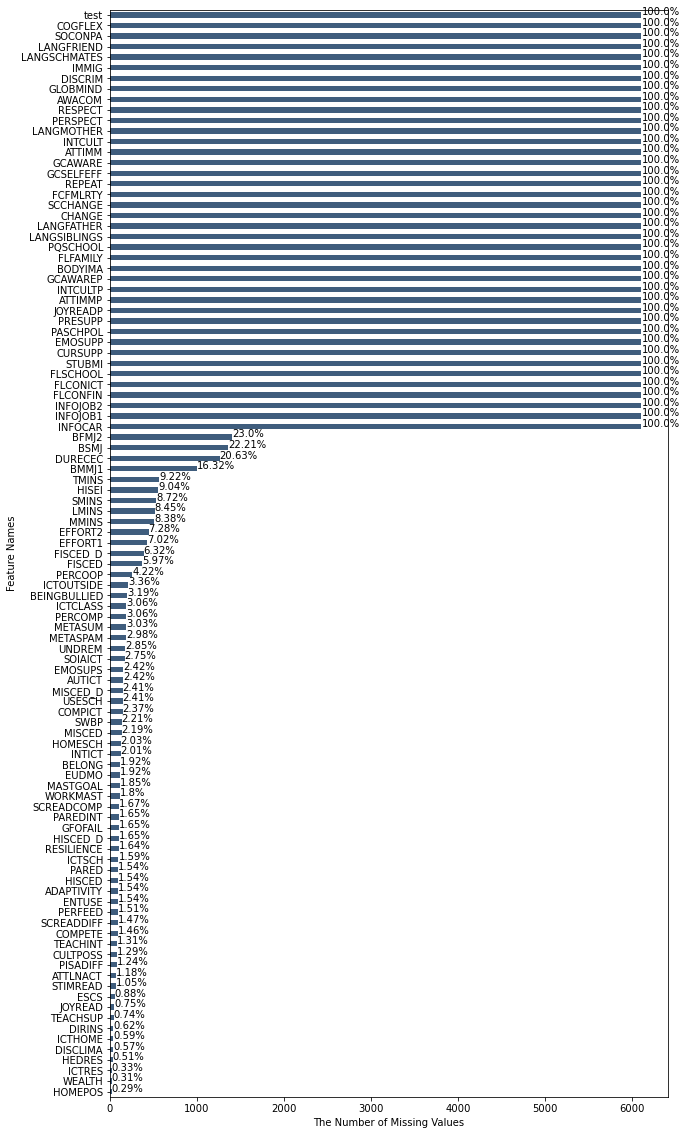

In [6]:
#Checking percentage of null values

Nan = pisa2018_japan.isnull().sum()[pisa2018_japan.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 20), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/pisa2018_japan.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names');

In [7]:
#Drop column with NAN more than 10%
NanPer = len(pisa2018_japan) *.90
pisa2018_japan = pisa2018_japan.dropna(thresh=NanPer, axis=1)

In [8]:
#split data into train and test
train_japan , test_japan  = train_test_split(pisa2018_japan, test_size=0.2, random_state=42)

print(f"No. of training examples: {train_japan.shape[0]}")
print(f"No. of testing examples: {test_japan.shape[0]}")

No. of training examples: 4887
No. of testing examples: 1222


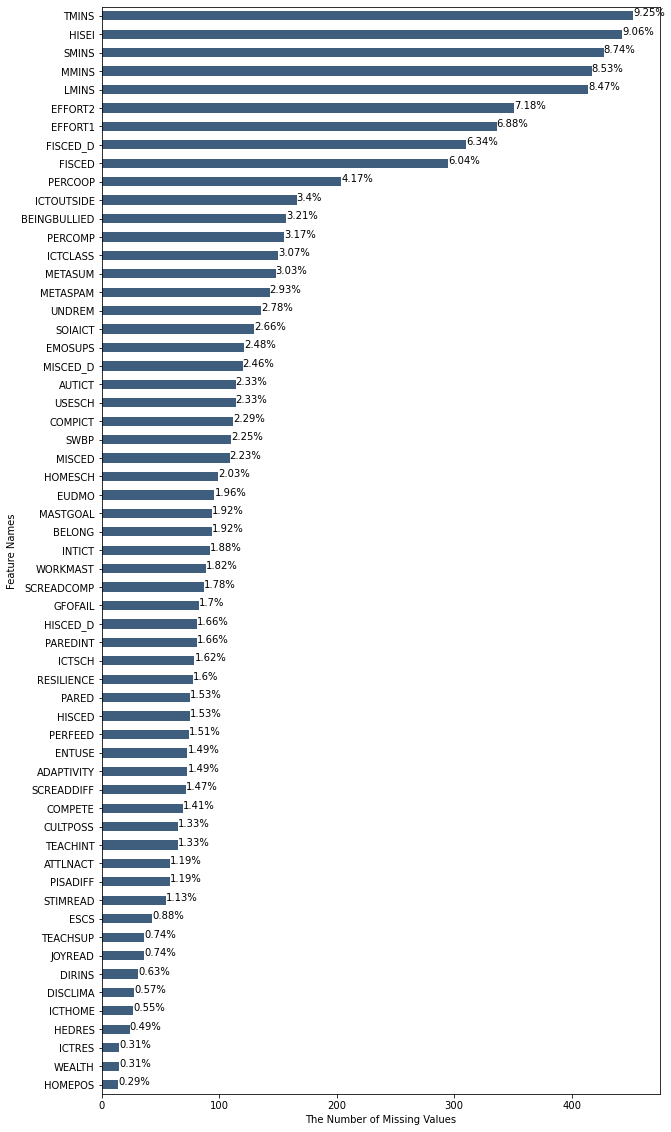

In [12]:
#Checking percentage of null values

Nan = train_japan.isnull().sum()[train_japan.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 20), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/train_japan.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names');

In [ ]:
#train_singapore['GENDER'] = train_singapore['GENDER'].astype('object')
#test_singapore['GENDER'] = test_singapore['GENDER'].astype('object')

In [13]:
#Fill NAN values with train columns' median
numvar = train_japan.dtypes !="object"
numeric_features = list(numvar[numvar].index)
for col in numeric_features:
    train_japan[col].fillna(train_japan[col].median(), inplace=True)
    test_japan[col].fillna(train_japan[col].median(), inplace=True)

In [14]:
#Fill NAN values with train columns' mode
obvar = train_japan.dtypes =="object"
categorical_features = list(obvar[obvar].index)
for col in categorical_features:
    train_japan[col].fillna(train_japan[col].mode()[0], inplace=True)
    test_japan[col].fillna(train_japan[col].mode()[0], inplace=True)

In [15]:
categorical_features

['CNTRYID',
 'STRATUM',
 'OCOD1',
 'OCOD2',
 'OCOD3',
 'PROGN',
 'COBN_S',
 'COBN_M',
 'COBN_F',
 'LANGN',
 'ISCEDL',
 'ISCEDD',
 'ISCEDO',
 'MISCED',
 'FISCED',
 'HISCED',
 'MISCED_D',
 'FISCED_D',
 'HISCED_D',
 'UNIT',
 'VER_DAT']

In [16]:
train_japan.isnull().sum().sum(),test_japan.isnull().sum().sum()

(0, 0)

In [17]:
list(train_japan.columns)

['CNTRYID',
 'CNTSCHID',
 'CNTSTUID',
 'STRATUM',
 'EFFORT1',
 'EFFORT2',
 'OCOD1',
 'OCOD2',
 'OCOD3',
 'GRADE',
 'AGE',
 'PROGN',
 'COBN_S',
 'COBN_M',
 'COBN_F',
 'LANGN',
 'ISCEDL',
 'ISCEDD',
 'ISCEDO',
 'MISCED',
 'FISCED',
 'HISCED',
 'PARED',
 'MISCED_D',
 'FISCED_D',
 'HISCED_D',
 'PAREDINT',
 'HISEI',
 'MMINS',
 'LMINS',
 'SMINS',
 'TMINS',
 'ESCS',
 'UNDREM',
 'METASUM',
 'METASPAM',
 'ICTHOME',
 'ICTSCH',
 'HOMEPOS',
 'CULTPOSS',
 'HEDRES',
 'WEALTH',
 'ICTRES',
 'DISCLIMA',
 'TEACHSUP',
 'DIRINS',
 'PERFEED',
 'EMOSUPS',
 'STIMREAD',
 'ADAPTIVITY',
 'TEACHINT',
 'JOYREAD',
 'SCREADCOMP',
 'SCREADDIFF',
 'PISADIFF',
 'PERCOMP',
 'PERCOOP',
 'ATTLNACT',
 'COMPETE',
 'WORKMAST',
 'GFOFAIL',
 'EUDMO',
 'SWBP',
 'RESILIENCE',
 'MASTGOAL',
 'BELONG',
 'BEINGBULLIED',
 'ENTUSE',
 'HOMESCH',
 'USESCH',
 'INTICT',
 'COMPICT',
 'AUTICT',
 'SOIAICT',
 'ICTCLASS',
 'ICTOUTSIDE',
 'UNIT',
 'WVARSTRR',
 'SENWT',
 'VER_DAT',
 'GENDER',
 'MATH',
 'SCIENCE',
 'READ',
 'TOTALSCORE']

In [18]:
train_japan.set_index('CNTSTUID', inplace=True)
test_japan.set_index('CNTSTUID', inplace=True)

In [19]:
train_japan.drop(columns=['CNTRYID','CNTSCHID','STRATUM','OCOD1','OCOD2','OCOD3','PROGN','COBN_S',
                                'COBN_M','COBN_F','LANGN','UNIT', 'VER_DAT', 'SENWT'], axis =1, inplace = True)
test_japan.drop(columns=['CNTRYID','CNTSCHID','STRATUM','OCOD1','OCOD2','OCOD3','PROGN','COBN_S',
                                'COBN_M','COBN_F','LANGN','UNIT', 'VER_DAT', 'SENWT'], axis =1, inplace = True)

In [20]:
train_japan.shape, test_japan.shape

((4887, 70), (1222, 70))

In [21]:
obvar = train_japan.dtypes =="object"
categorical_features = list(obvar[obvar].index)
categorical_features

['ISCEDL',
 'ISCEDD',
 'ISCEDO',
 'MISCED',
 'FISCED',
 'HISCED',
 'MISCED_D',
 'FISCED_D',
 'HISCED_D']

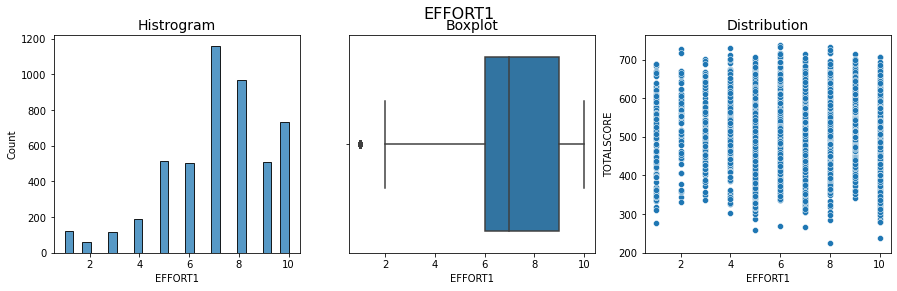

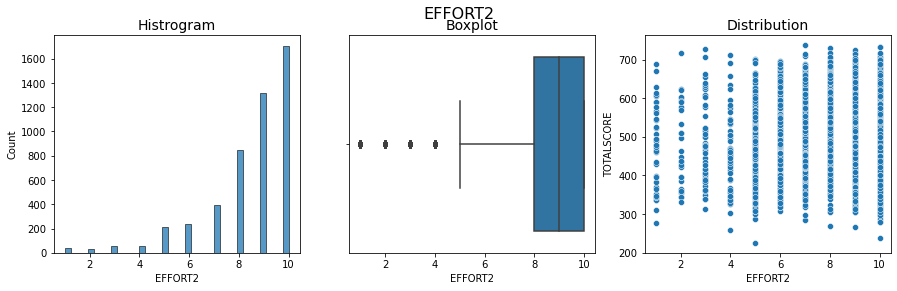

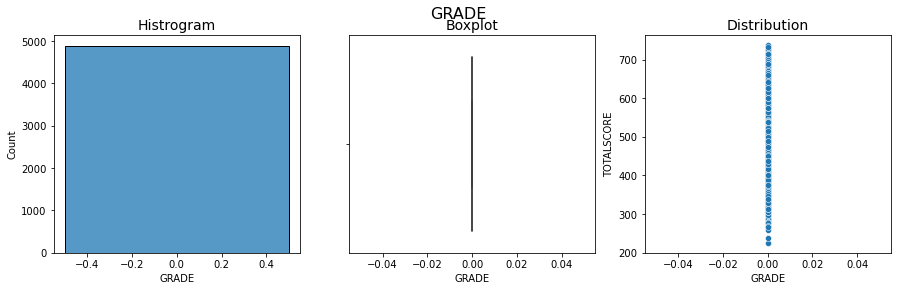

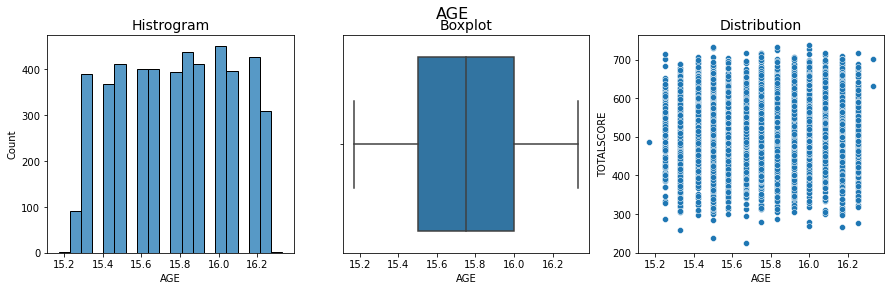

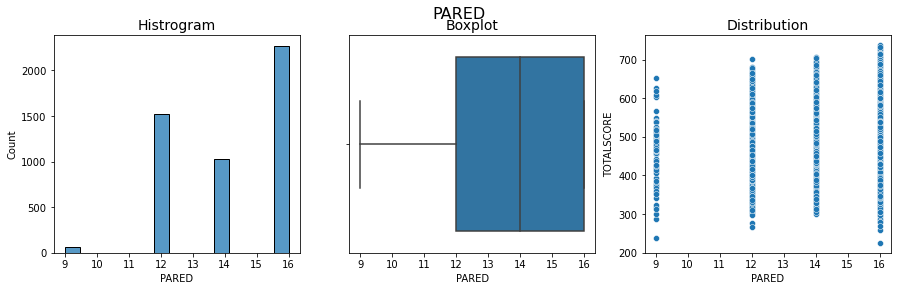

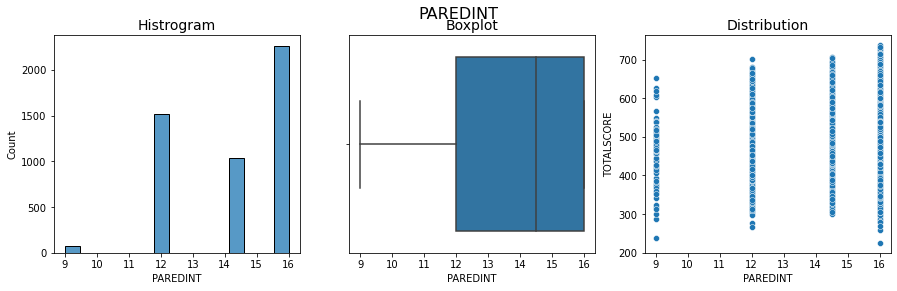

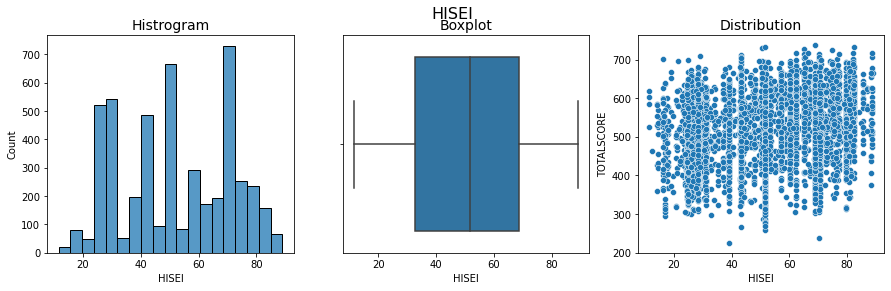

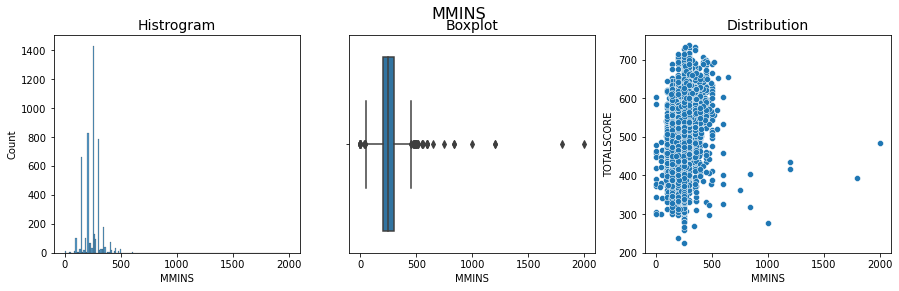

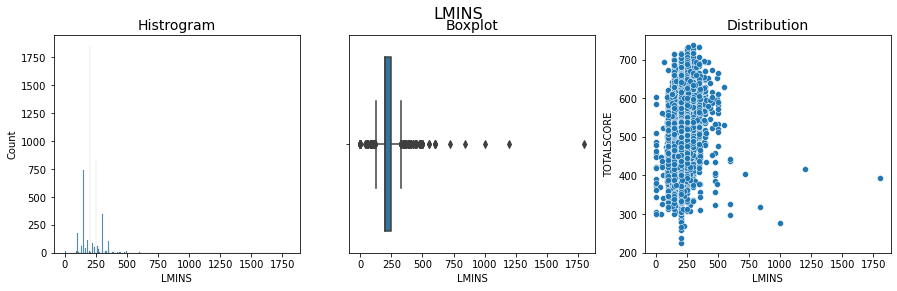

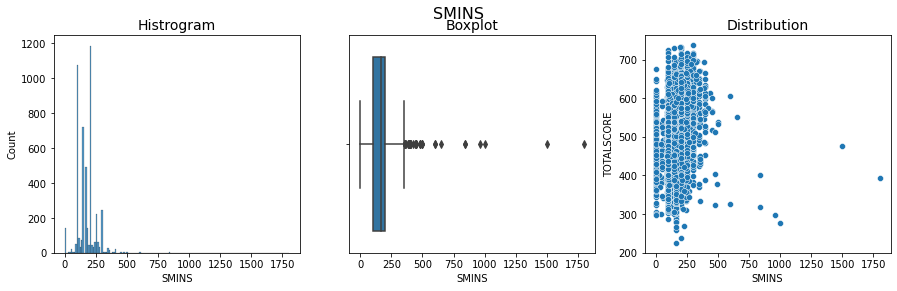

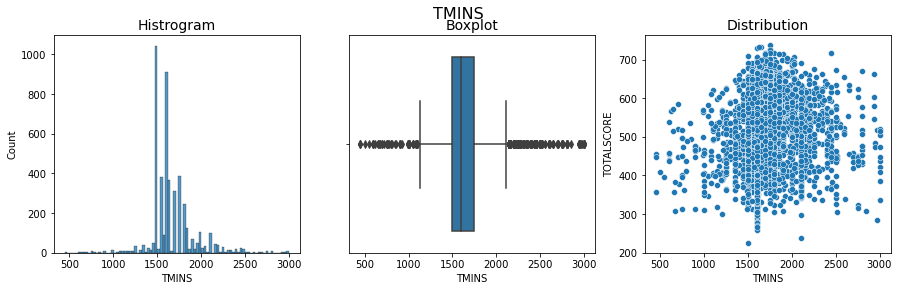

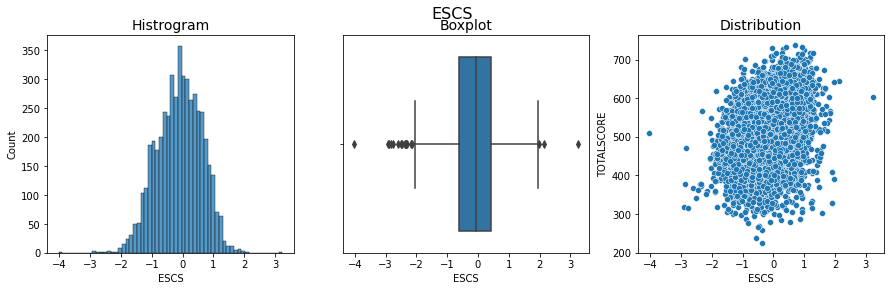

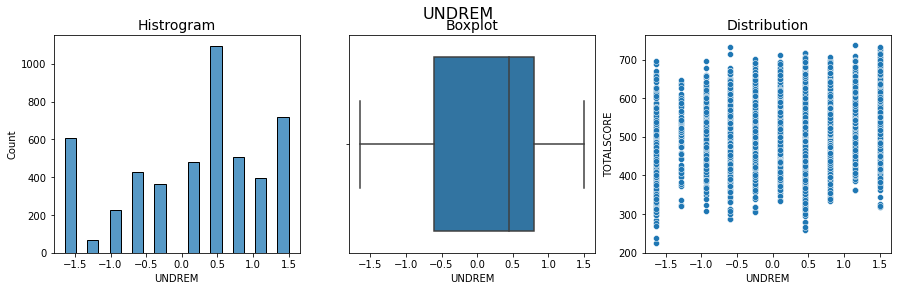

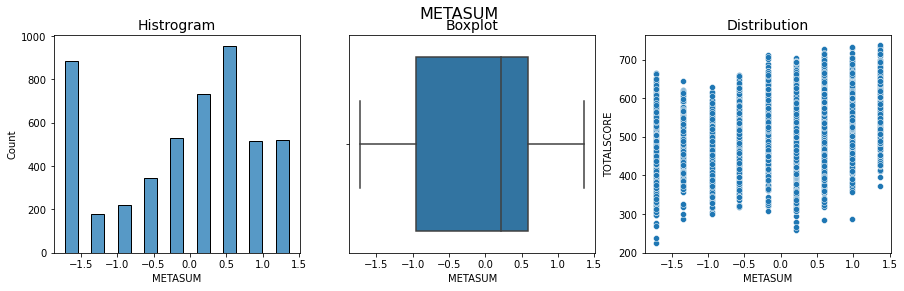

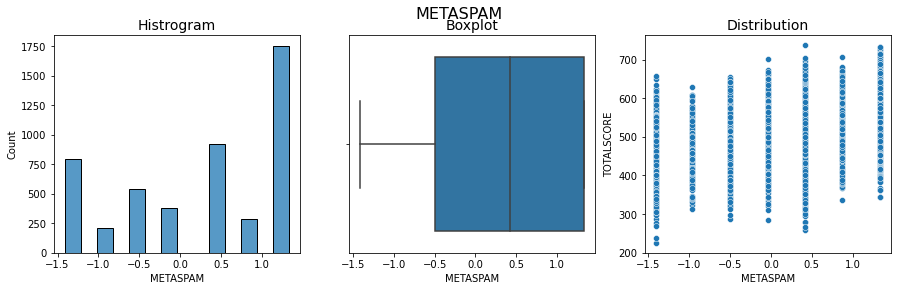

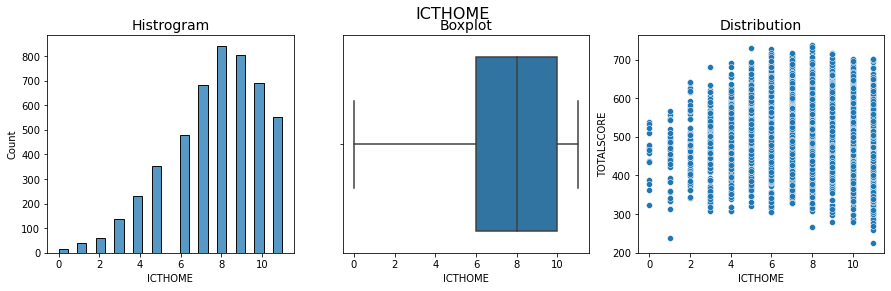

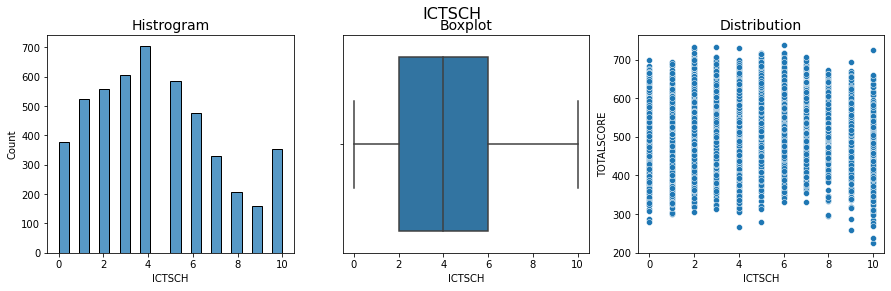

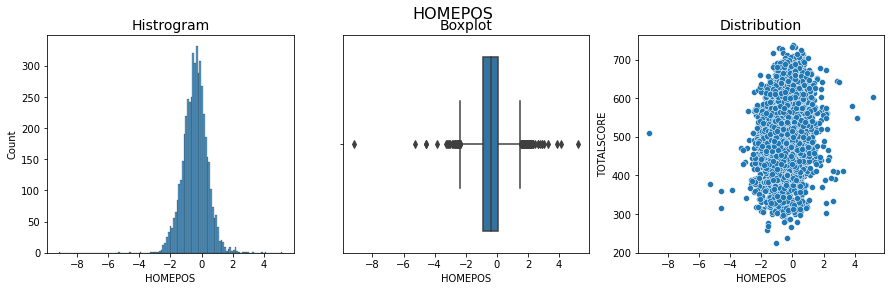

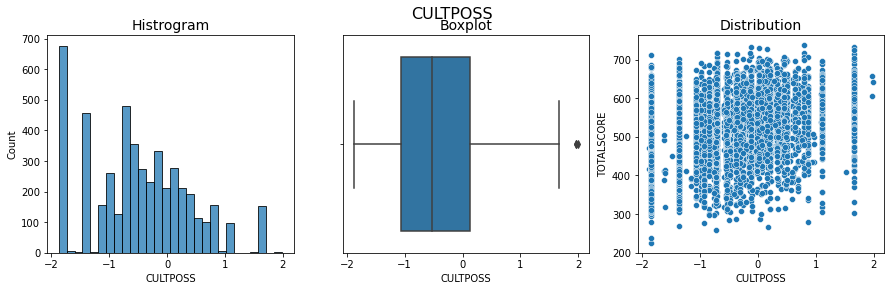

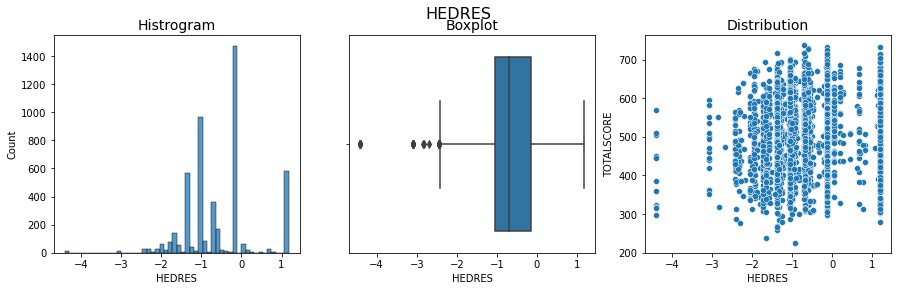

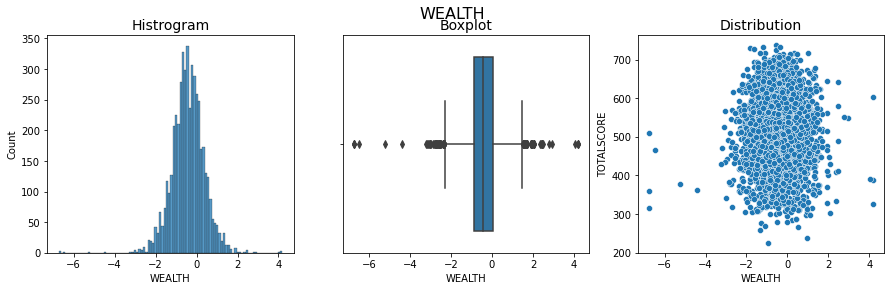

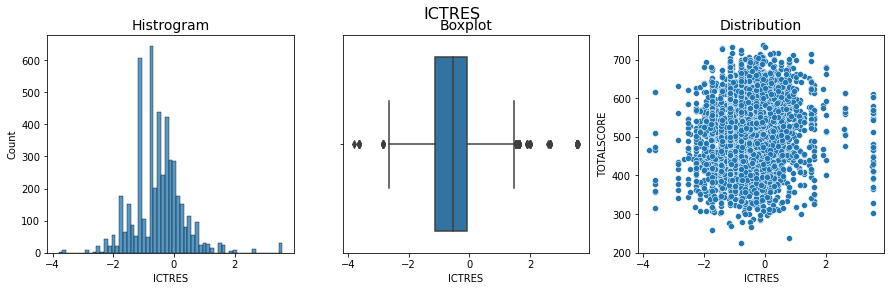

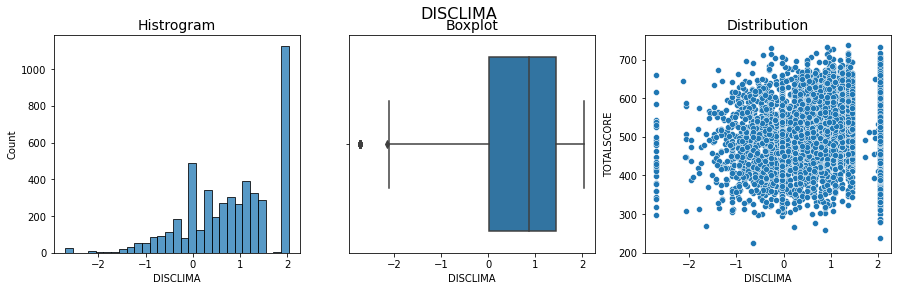

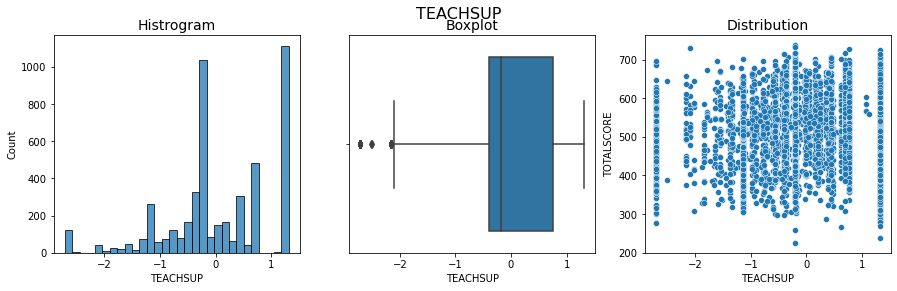

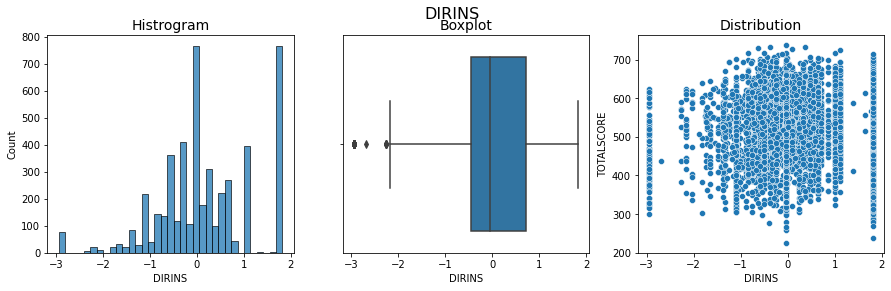

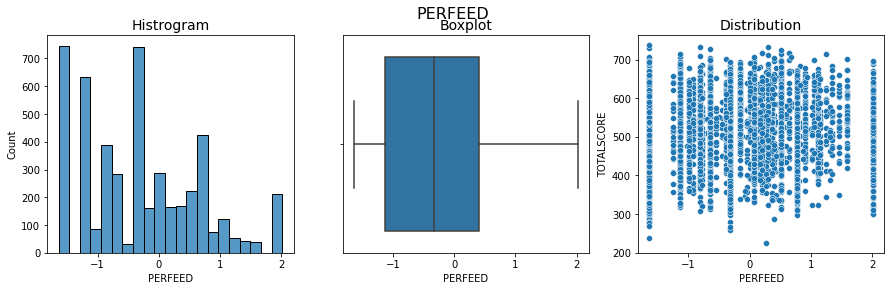

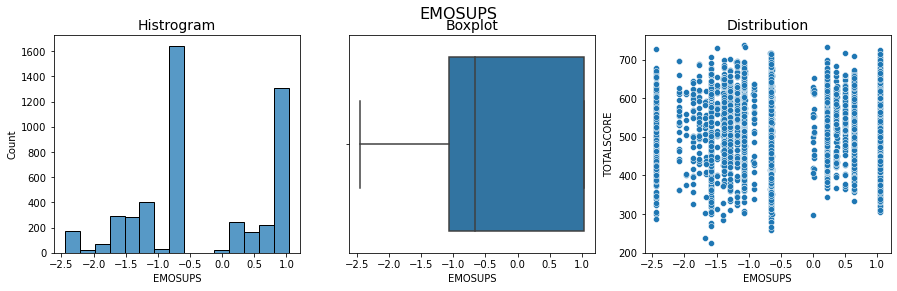

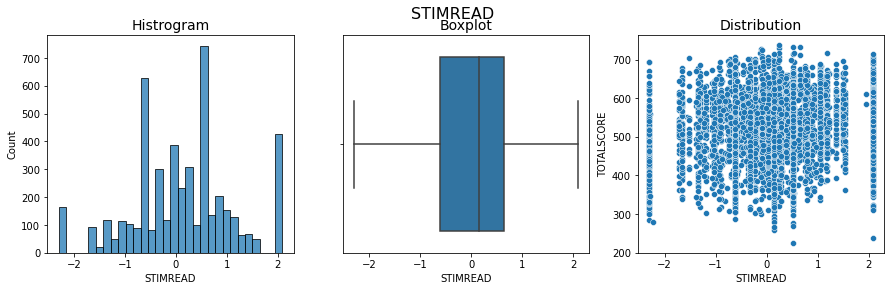

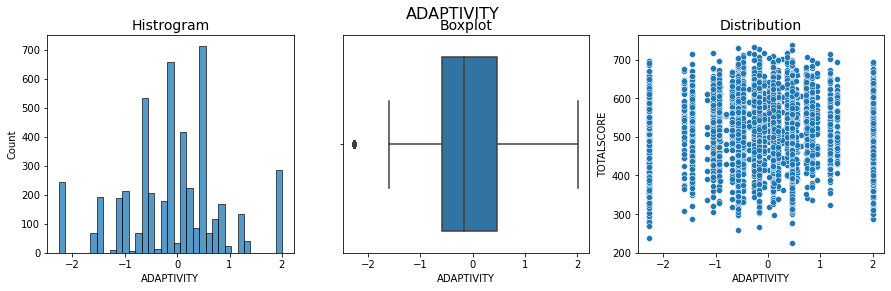

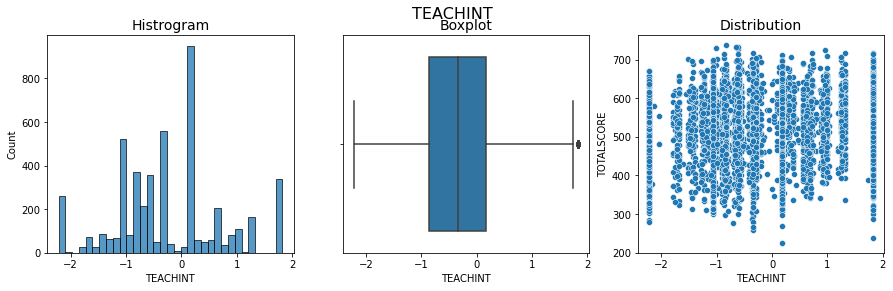

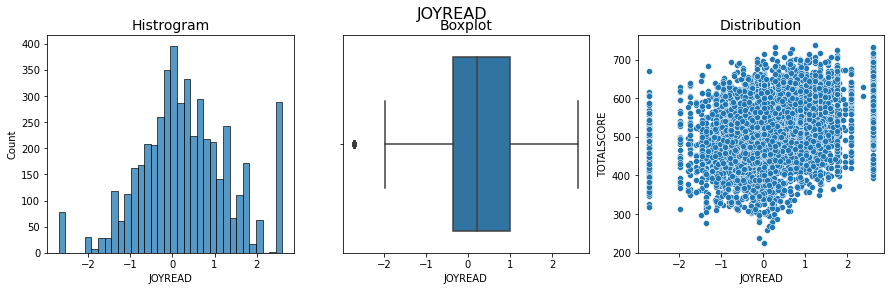

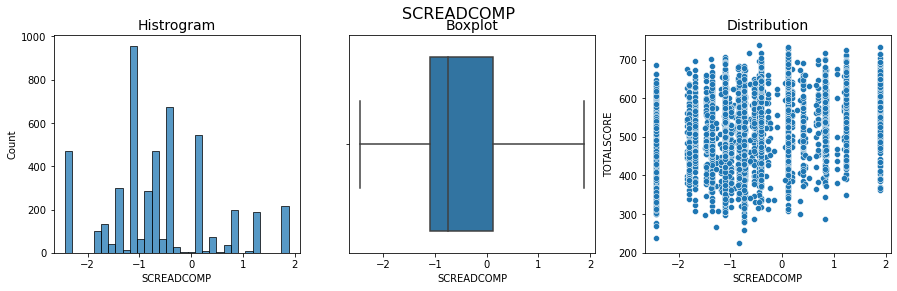

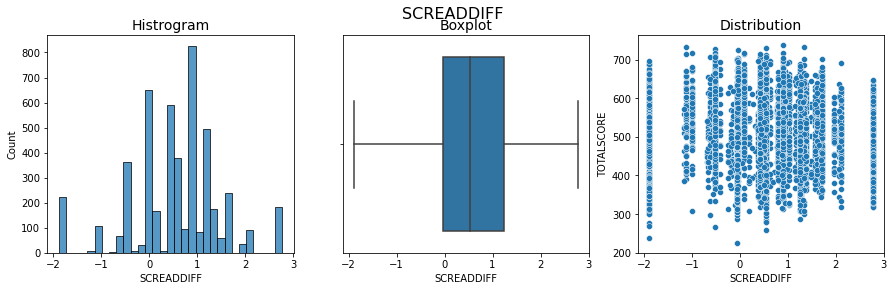

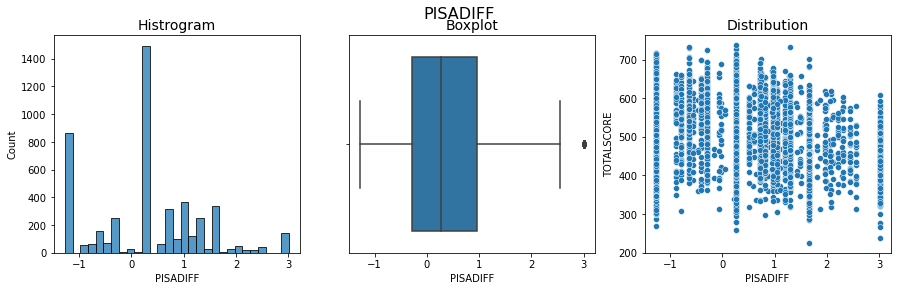

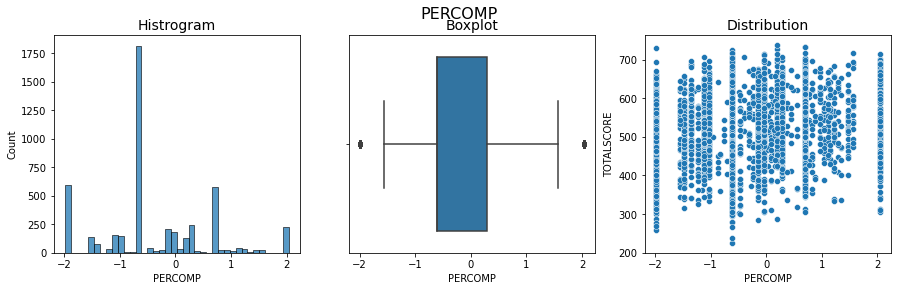

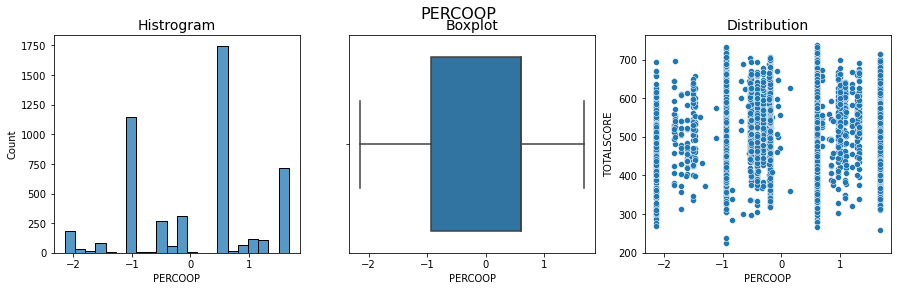

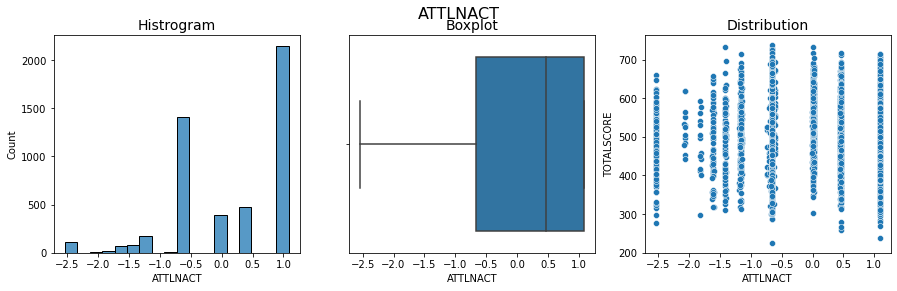

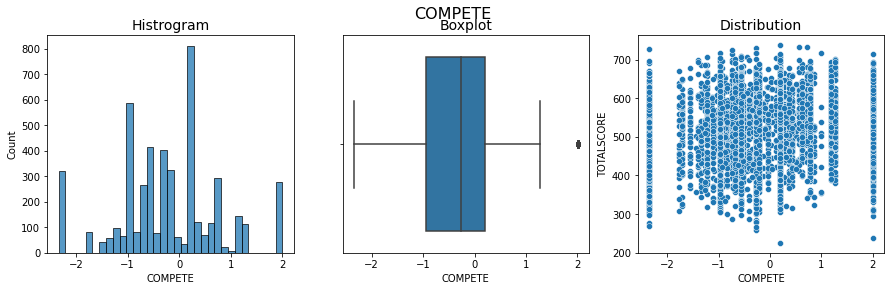

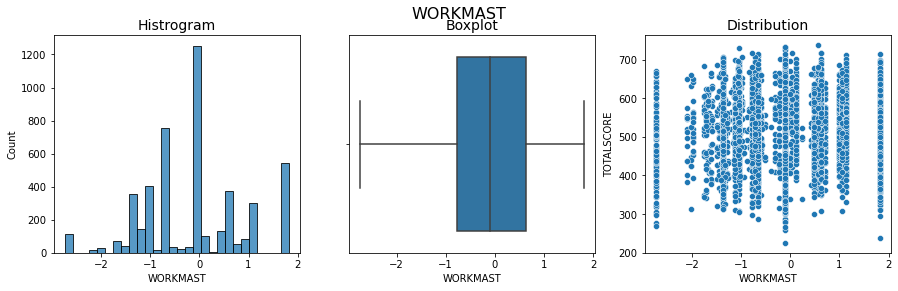

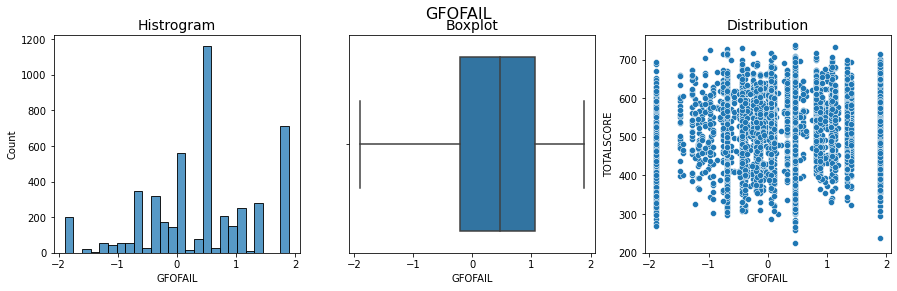

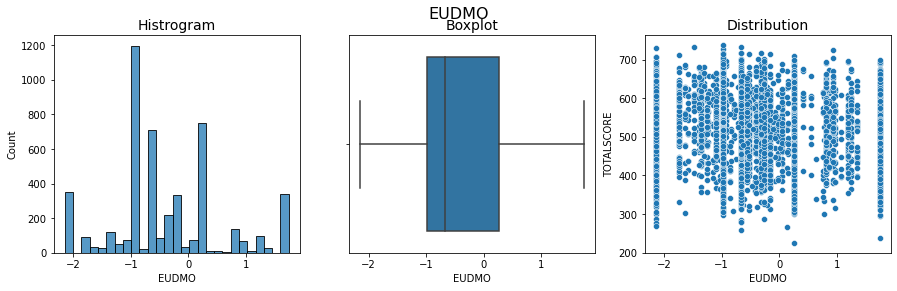

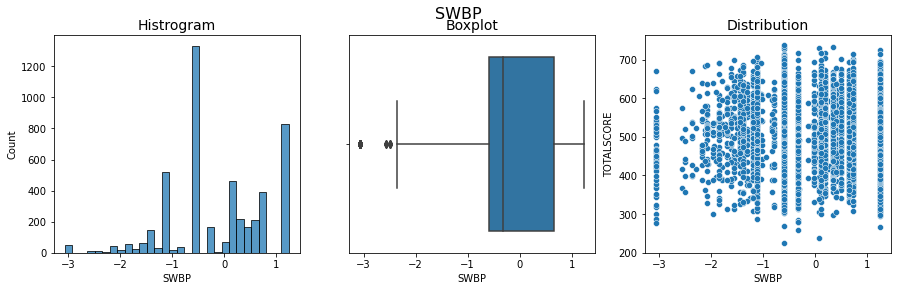

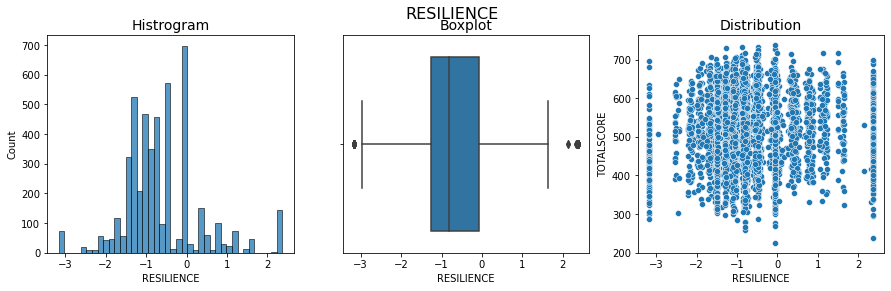

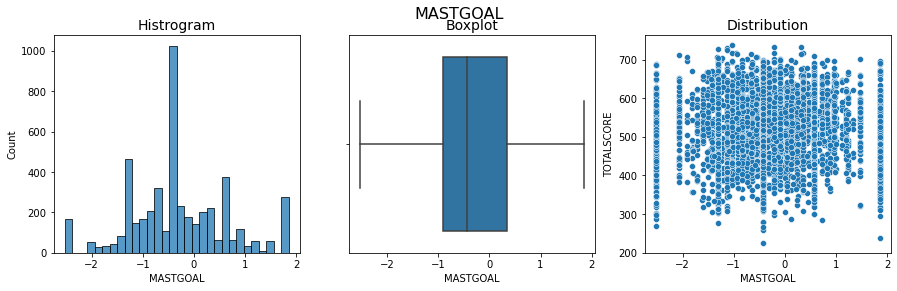

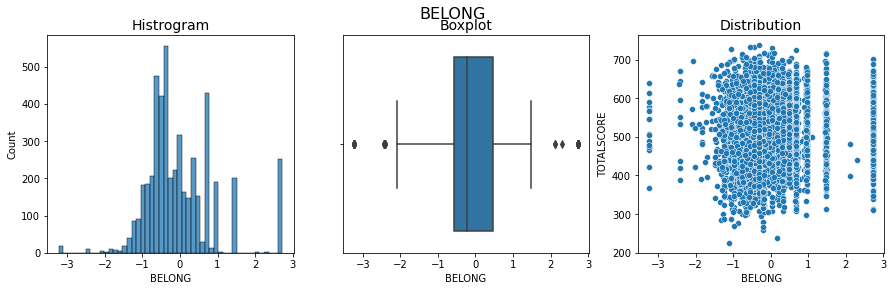

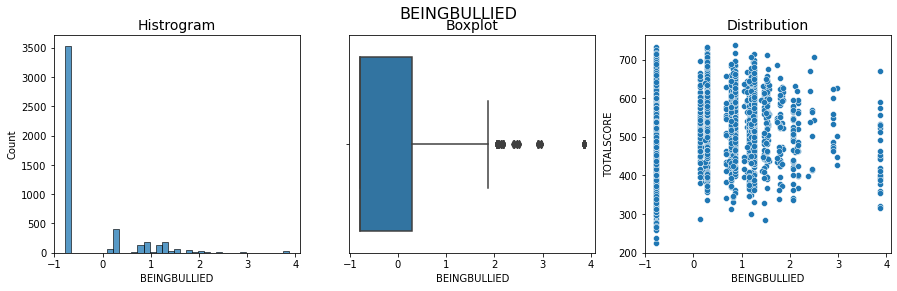

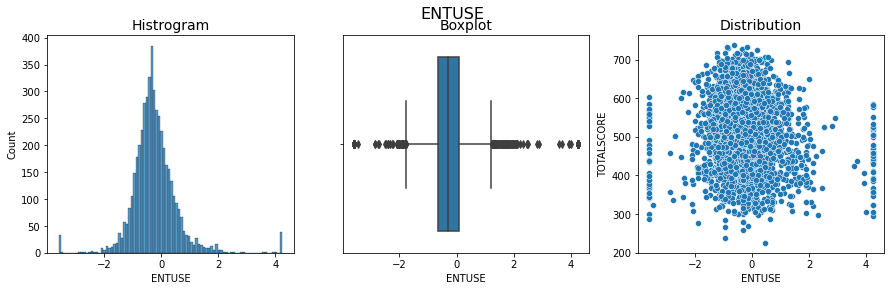

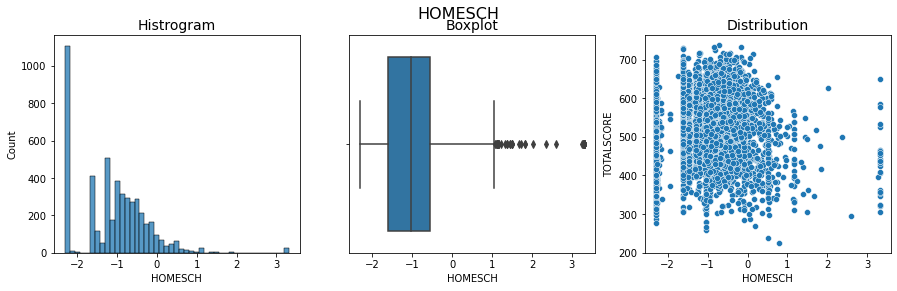

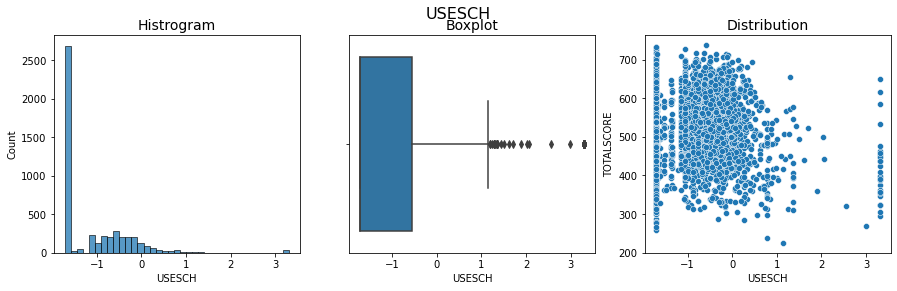

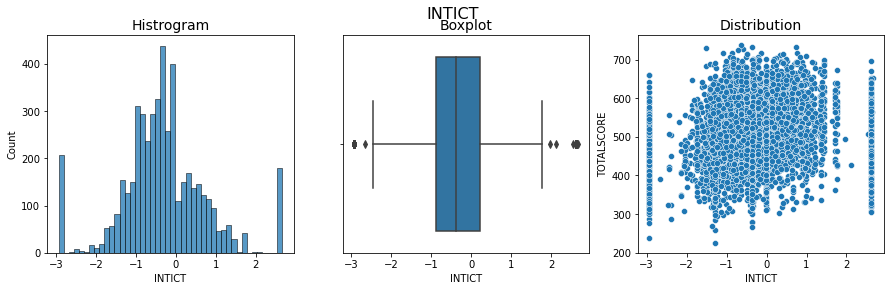

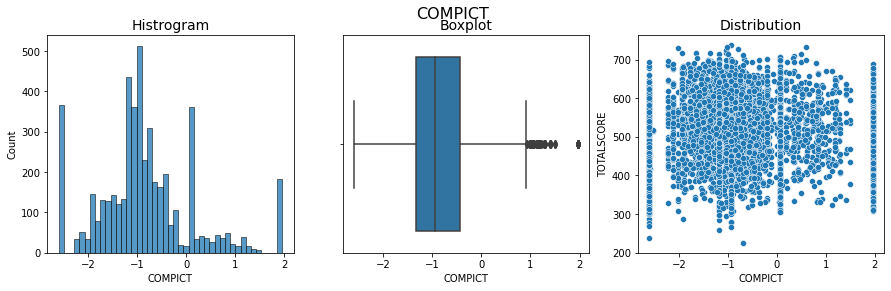

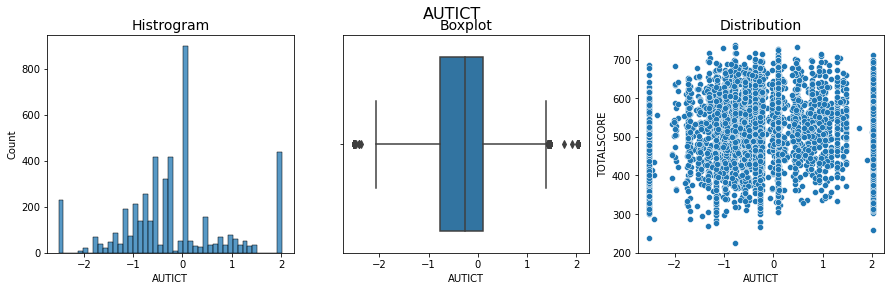

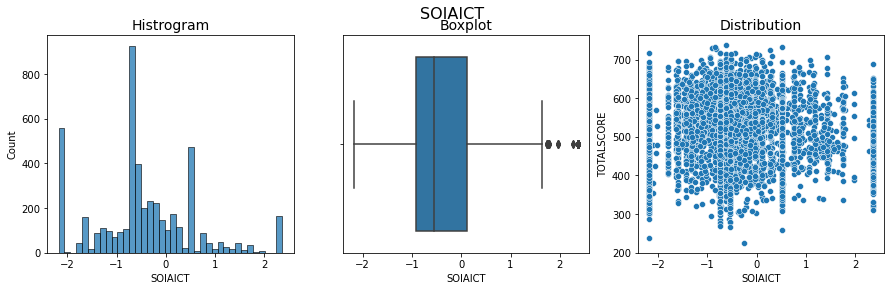

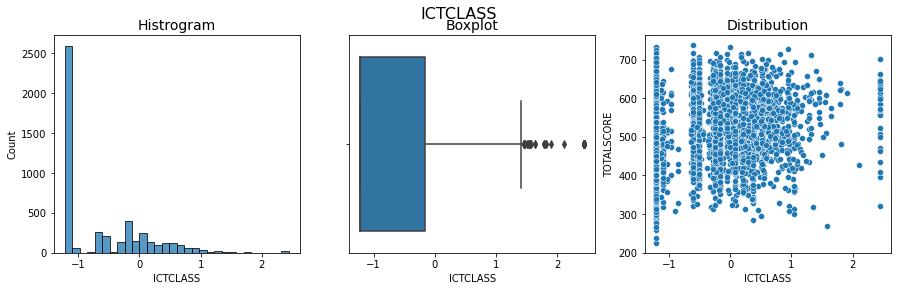

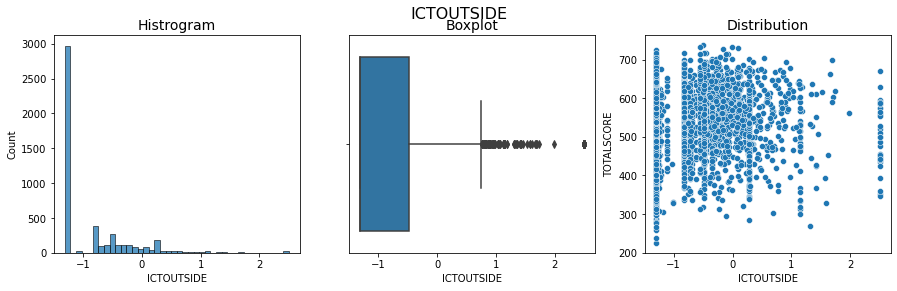

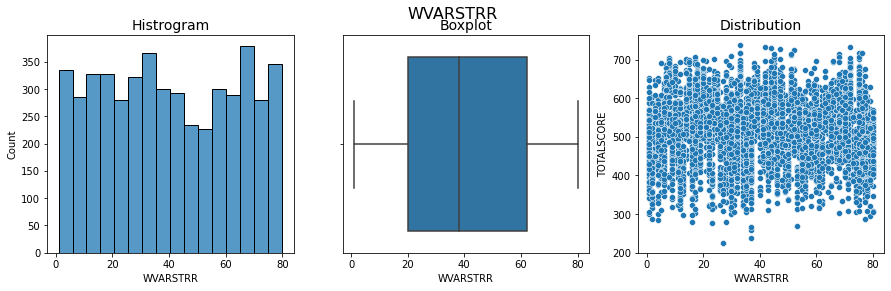

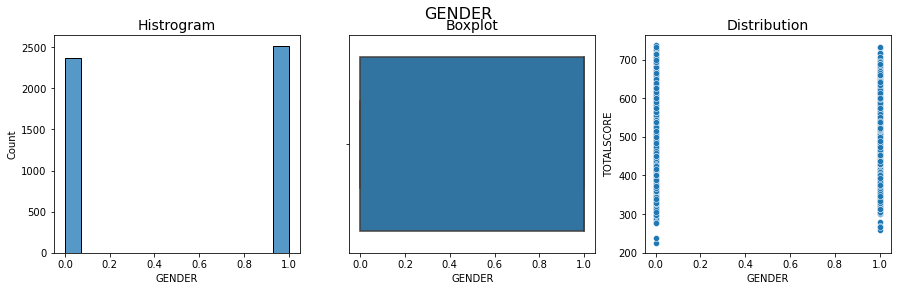

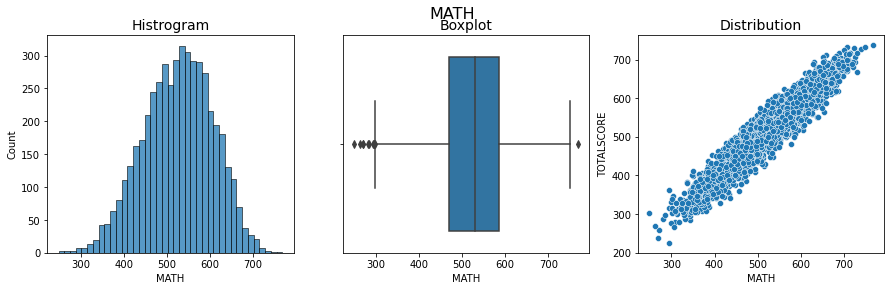

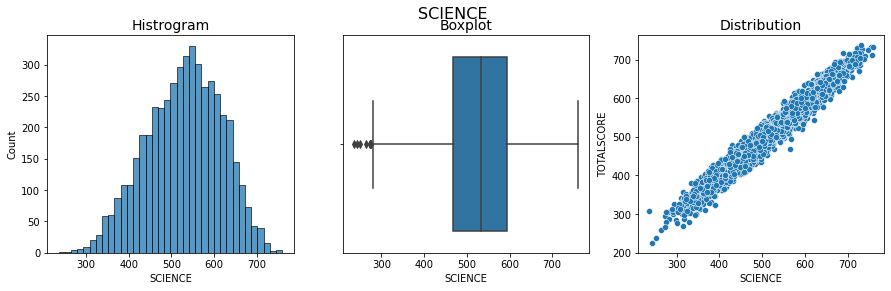

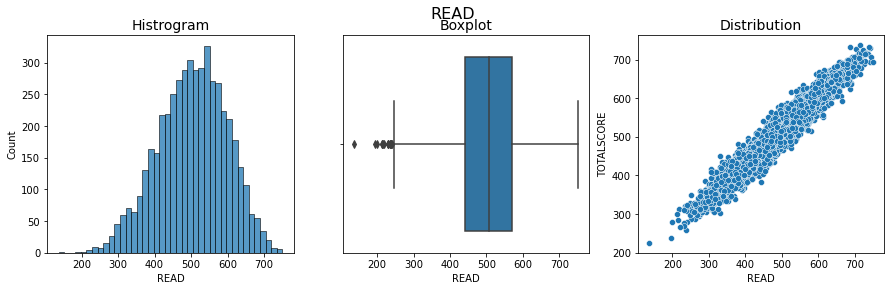

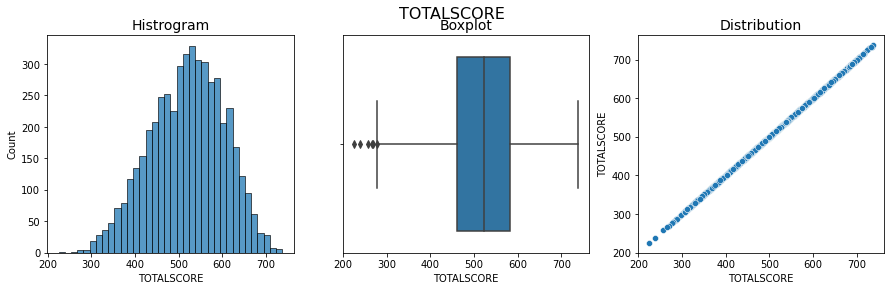

In [22]:
numvar = train_japan.dtypes !="object"
numeric_features = list(numvar[numvar].index)
for col in numeric_features:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    ax = ax.ravel() 
    fig.suptitle(f"{col}\n", fontsize=16)
    ax[0].set_title(f'Histrogram', fontsize =14)
    sns.histplot(train_japan[col], ax=ax[0])
    ax[1].set_title(f'Boxplot', fontsize =14)
    sns.boxplot(x=train_japan[col], ax=ax[1])
    ax[2].set_title(f'Distribution', fontsize =14)
    sns.scatterplot(x = train_japan[col], y= train_japan['TOTALSCORE'],ax=ax[2])
    plt.show()

In [23]:
#remove extreme outliers
train_japan = train_japan[(train_japan['MMINS'] < 1500)]
train_japan = train_japan[(train_japan['LMINS'] < 1500)]
train_japan = train_japan[(train_japan['SMINS'] < 1500)]
train_japan = train_japan[(train_japan['ESCS'] > -4)]
train_japan = train_japan[(train_japan['HOMEPOS'] > -5)]
train_japan = train_japan[(train_japan['WEALTH'] > -4)]

In [ ]:
#remove extreme outliers
test_japan = test_japan[(test_japan['MMINS'] < 1500)]
test_japan = test_japan[(test_japan['LMINS'] < 1500)]
test_japan = test_japan[(test_japan['SMINS'] < 1500)]
test_japan = test_japan[(test_japan['ESCS'] > -4)]
test_japan = test_japan[(test_japan['HOMEPOS'] > -5)]
test_japan = test_japan[(test_japan['WEALTH'] > -4)]

In [ ]:
train_japan.shape, test_japan.shape

In [24]:
# Creating a function to plot boxplot

def subplot_boxplot(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    
    ax = ax.ravel() 
    
    if len(list_of_columns) %2 !=0:
        
        ax[len(list_of_columns)].set_visible(False)
        
    for i, column in enumerate(list_of_columns):
        
        names = train_japan.groupby(column).mean()['TOTALSCORE'].sort_values().index
        
        sns.boxplot(x = dataframe[column],y = dataframe['TOTALSCORE'],order = names, ax = ax[i], color="#99d6ff") 
        
        ax[i].set_title(f'TOTALSCORE  vs {column}', fontsize =16)
        
        ax[i].set_ylabel('Values',fontsize=15)
        
        ax[i].set_xlabel(column,fontsize=15) 
        
        ax[i].set_xticklabels(names,rotation=40) 
        
    plt.tight_layout()

In [ ]:
train_singapore['GENDER'] = train_singapore['GENDER'].astype('object')

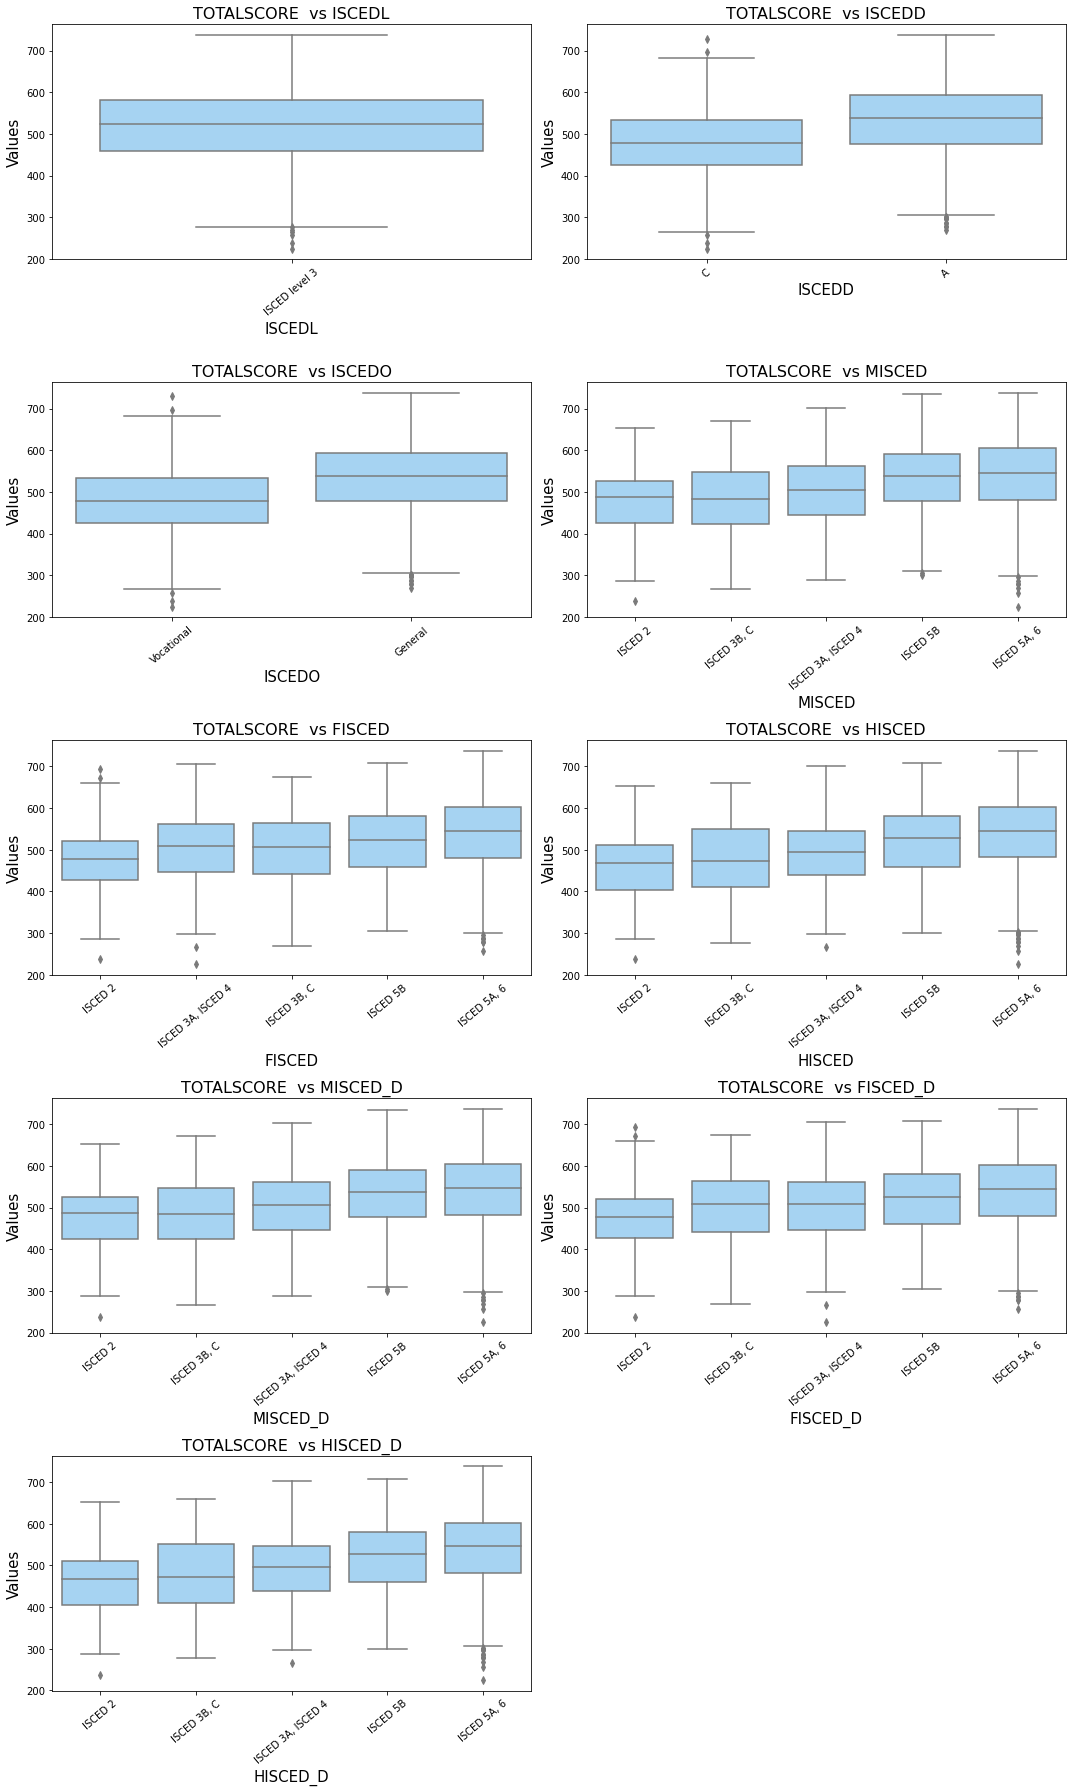

In [25]:
obvar = train_japan.dtypes =="object"
categorical_features = list(obvar[obvar].index) 
subplot_boxplot(train_japan, categorical_features)

In [26]:
train_japan.drop(columns=['MISCED_D', 'FISCED_D', 'HISCED_D', 'ISCEDD', 'PARED'], axis =1, inplace = True)
test_japan.drop(columns=['MISCED_D', 'FISCED_D', 'HISCED_D', 'ISCEDD', 'PARED'], axis =1, inplace = True)

In [27]:
# grouping values of categorical columns to reduce number of categories. 
train_japan['Is_MISCED_5A,6'] = np.where(train_japan['MISCED'] == 'ISCED 5A, 6', 1, 0)
train_japan['Is_FISCED_5A,6'] = np.where(train_japan['FISCED'] == 'ISCED 5A, 6', 1, 0)
train_japan['Is_HISCED_5A,6'] = np.where(train_japan['HISCED'] == 'ISCED 5A, 6', 1, 0)

In [28]:
# grouping values of categorical columns to reduce number of categories. 
test_japan['Is_MISCED_5A,6'] = np.where(test_japan['MISCED'] == 'ISCED 5A, 6', 1, 0)
test_japan['Is_FISCED_5A,6'] = np.where(test_japan['FISCED'] == 'ISCED 5A, 6', 1, 0)
test_japan['Is_HISCED_5A,6'] = np.where(test_japan['HISCED'] == 'ISCED 5A, 6', 1, 0)

In [29]:
#drop original columns
train_japan.drop(columns= ['MISCED', 'FISCED', 'HISCED'], axis =1, inplace =True)
test_japan.drop(columns= ['MISCED', 'FISCED', 'HISCED'], axis =1, inplace =True)

In [30]:
train_japan_cormatrix = train_japan.drop(columns= ['MATH','SCIENCE','READ','TOTALSCORE',], axis =1)

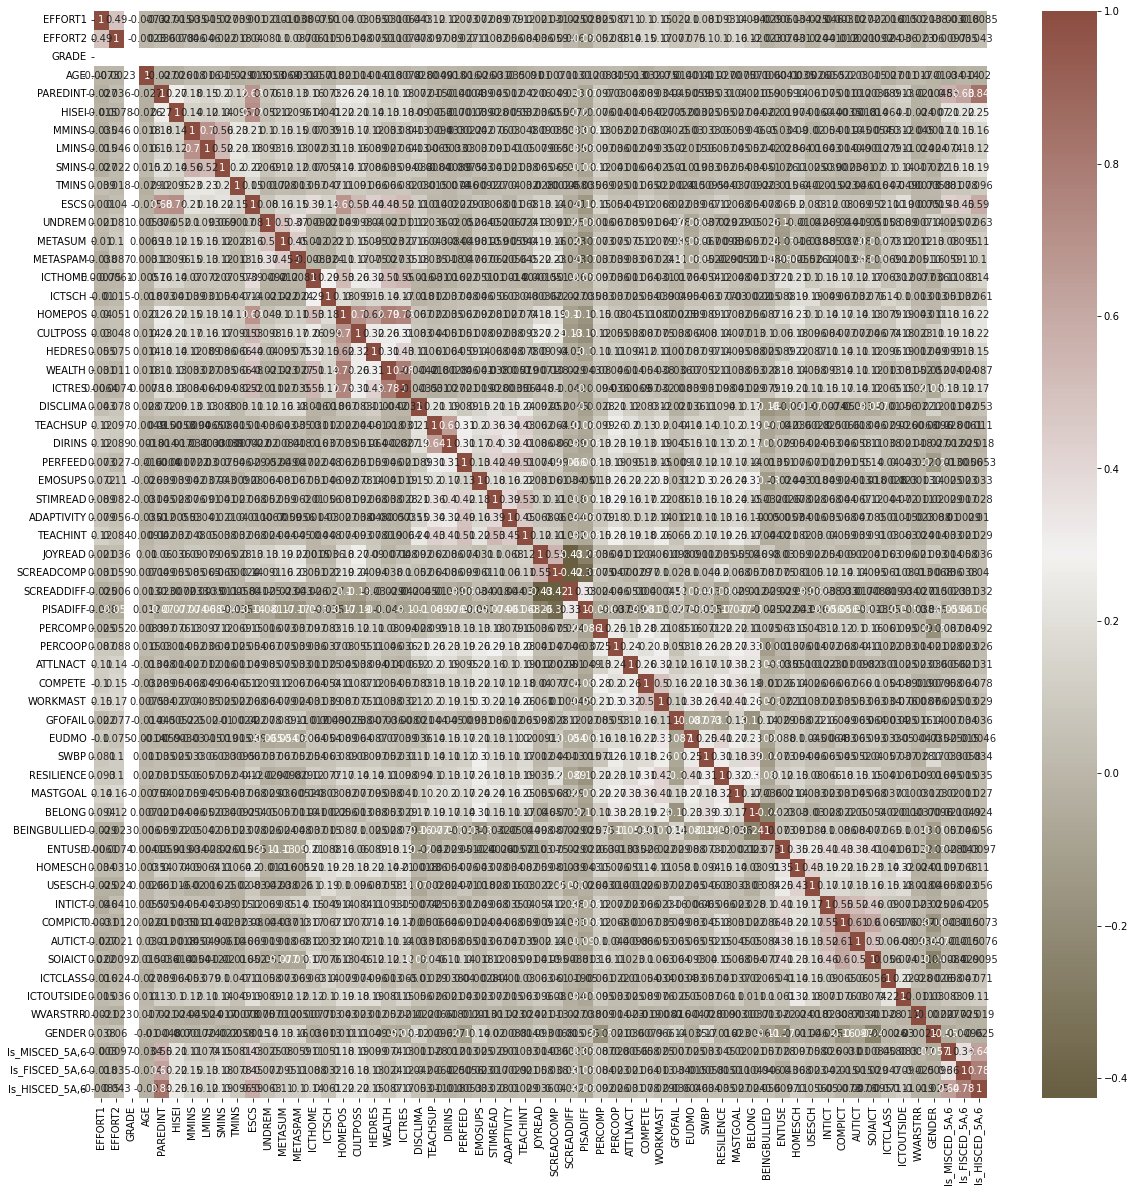

In [32]:
#Checking collinearity using correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= train_japan_cormatrix.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap=cmap,annot=True);

In [33]:
# Drop columns with high correlation 
#Create correlation matrix
corr_matrix = train_japan_cormatrix.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(to_drop)

[]


In [ ]:
# Drop features 
#train_singapore.drop(to_drop, axis=1, inplace=True)
#test_singapore.drop(to_drop, axis=1, inplace=True)
#train_singapore.shape, test_singapore.shape

In [ ]:
#Exploring target variables

In [34]:
train_japan[['MATH','READ', 'SCIENCE','TOTALSCORE']].describe().round(2)

MATH     READ  SCIENCE  TOTALSCORE
count  4878.00  4878.00  4878.00     4878.00
mean    526.09   503.16   528.61      519.29
std      80.15    93.84    87.27       84.33
min     248.82   136.54   235.78      224.87
25%     470.41   439.99   466.86      459.96
50%     530.43   506.92   533.56      523.98
75%     584.61   571.09   593.55      581.34
max     768.02   750.15   759.72      737.42

<Figure size 432x432 with 0 Axes>

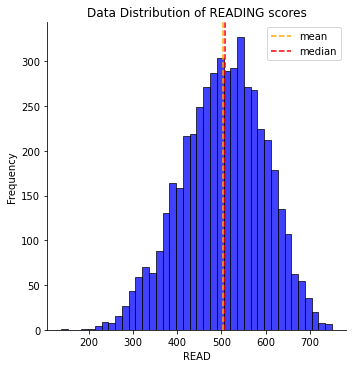

In [35]:
#checking Data Distribution of READING scores
plt.figure(figsize=(6,6))

sns.displot(train_japan['READ'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of READING scores')

plt.axvline(train_japan['READ'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_japan['READ'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();


<Figure size 432x432 with 0 Axes>

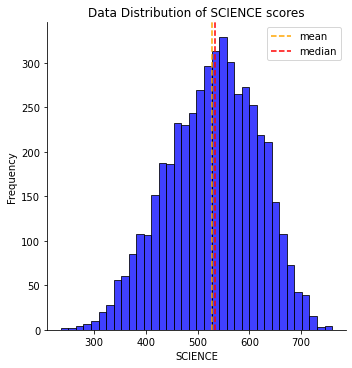

In [36]:
#checking Data Distribution of SCIENCE scores
plt.figure(figsize=(6,6))

sns.displot(train_japan['SCIENCE'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of SCIENCE scores')

plt.axvline(train_japan['SCIENCE'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_japan['SCIENCE'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

<Figure size 432x432 with 0 Axes>

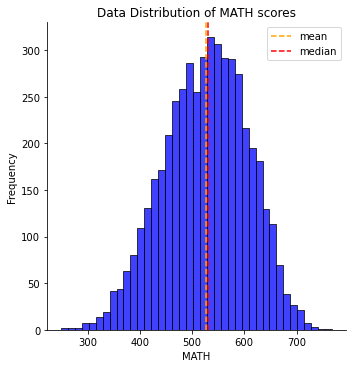

In [37]:
#checking Data Distribution of MATH scores
plt.figure(figsize=(6,6))

sns.displot(train_japan['MATH'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of MATH scores')

plt.axvline(train_japan['MATH'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_japan['MATH'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

<Figure size 432x432 with 0 Axes>

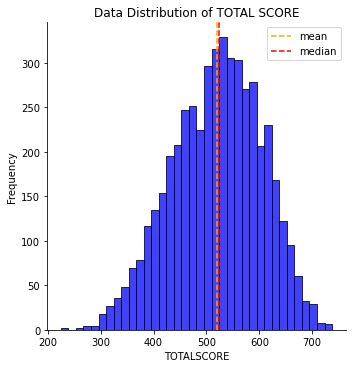

In [40]:
#checking Data Distribution of TOTAL scores
plt.figure(figsize=(6,6))

sns.displot(train_japan['TOTALSCORE'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of TOTAL SCORE')

plt.axvline(train_japan['TOTALSCORE'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_japan['TOTALSCORE'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

In [39]:
#Exploring features with high correlation wiht target variable

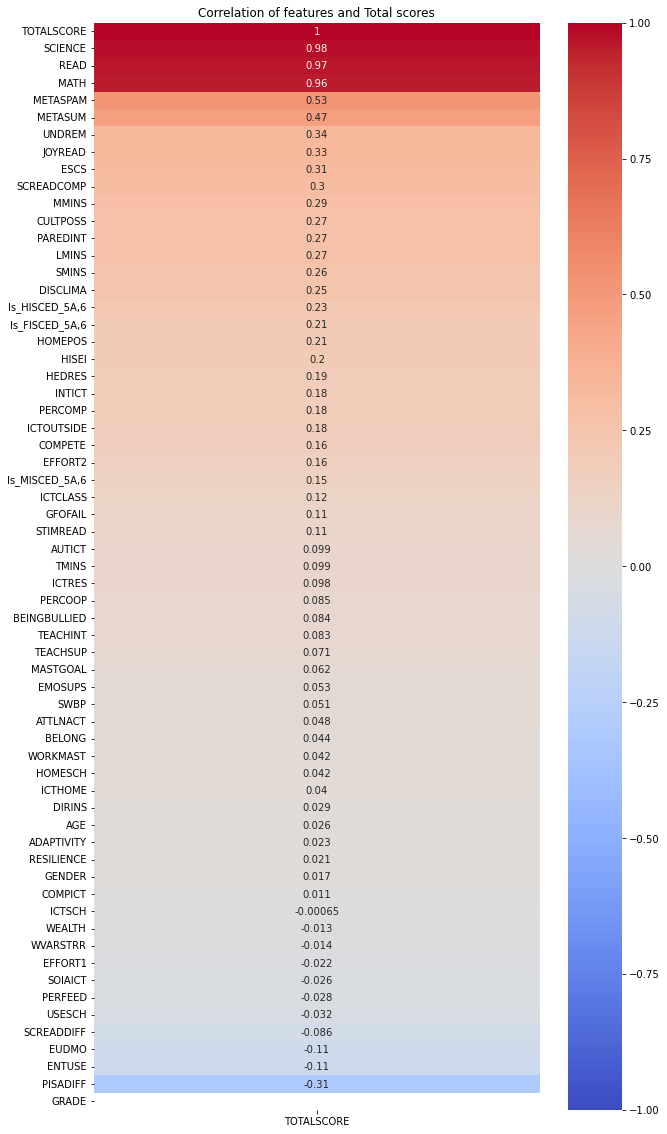

In [41]:
plt.figure(figsize = (10,20))
sns.heatmap(train_japan.corr()[['TOTALSCORE']].sort_values(by = 'TOTALSCORE', ascending = False), 
                cmap = 'coolwarm',
                vmax = 1,
                vmin = -1,
                annot = True)
plt.title('Correlation of features and Total scores')

plt.yticks(rotation =0)
plt.show()

In [42]:
selectd_features = (train_japan.corr()[['TOTALSCORE']] > 0.20) | (train_japan.corr()[['TOTALSCORE']] <= -0.20)
selectd_features[selectd_features['TOTALSCORE']==True].index.values

array(['PAREDINT', 'MMINS', 'LMINS', 'SMINS', 'ESCS', 'UNDREM', 'METASUM',
       'METASPAM', 'HOMEPOS', 'CULTPOSS', 'DISCLIMA', 'JOYREAD',
       'SCREADCOMP', 'PISADIFF', 'MATH', 'SCIENCE', 'READ', 'TOTALSCORE',
       'Is_FISCED_5A,6', 'Is_HISCED_5A,6'], dtype=object)

In [43]:
train_japan.to_csv('train_pisa2018_japan.csv')
test_japan.to_csv('test_pisa2018_japan.csv')

In [44]:
obvar = train_japan.dtypes =="object"
categorical_features = list(obvar[obvar].index) 
categorical_features

['ISCEDL', 'ISCEDO']

In [49]:
#Assemble our X and y variables
X_train =train_japan[['PAREDINT', 'MMINS', 'LMINS', 'SMINS', 'ESCS', 'UNDREM', 'METASUM',
       'METASPAM', 'HOMEPOS', 'CULTPOSS', 'DISCLIMA', 'JOYREAD','SCREADCOMP', 'PISADIFF',
       'Is_FISCED_5A,6', 'Is_HISCED_5A,6', 'ISCEDL', 'ISCEDO']]
X_train = pd.get_dummies(columns=['Is_FISCED_5A,6', 'Is_HISCED_5A,6', 'ISCEDL', 'ISCEDO'], 
                         drop_first =True, data =X_train)
y_train = train_japan['TOTALSCORE']

X_test =test_japan[['PAREDINT', 'MMINS', 'LMINS', 'SMINS', 'ESCS', 'UNDREM', 'METASUM',
       'METASPAM', 'HOMEPOS', 'CULTPOSS', 'DISCLIMA', 'JOYREAD','SCREADCOMP', 'PISADIFF',
        'Is_FISCED_5A,6', 'Is_HISCED_5A,6', 'ISCEDL', 'ISCEDO']]
X_test = pd.get_dummies(columns=['Is_FISCED_5A,6', 'Is_HISCED_5A,6', 'ISCEDL', 'ISCEDO'], 
                         drop_first =True, data =X_test)
y_test = test_japan['TOTALSCORE']

In [50]:
from sklearn.dummy import DummyRegressor
baseline_model = DummyRegressor()
baseline_model.fit(X_train, y_train)
baseline_preds = baseline_model.predict(X_test)
# Test Score
baseline_model.score(X_test, y_test)
print(f'Test R-squared Score: {baseline_model.score(X_test, y_test)}')
#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test, baseline_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, baseline_preds, squared = False)}' )

Test R-squared Score: -0.0010826814733786438
MSE is : 7241.1802539402215
RMSE is : 85.09512473661592


In [51]:
#scaler = StandardScaler()  #scaler object
#X_train_sc = scaler.fit_transform(X_train)  #scaling training set
#X_test_sc = scaler.transform(X_test)  #scaling test set


lr = LinearRegression()
lr.fit(X_train, y_train)

# Train Score
lr.score(X_train, y_train)
print(f'Train R-squared Score: {lr.score(X_train, y_train)}')
print()

# Test Score
lr.score(X_test, y_test)
print(f'Test R-squared Score: {lr.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(lr, X_train, y_train, cv =5)
print(f' Cross Val Score :{cross_val_score(lr, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = lr.predict(X_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

Train R-squared Score: 0.4884839322187554

Test R-squared Score: 0.5100757518277764
 Cross Val Score :[0.46674094 0.48486528 0.46725805 0.49945941 0.49226367]

MSE is : 3543.79299277245
RMSE is : 59.52976560320433


In [52]:
lr.intercept_

432.0992552805109

In [53]:
pd.Series(lr.coef_, index = X_train.columns).sort_values(ascending=False)

METASPAM             23.801656
METASUM              15.600626
ESCS                 10.702797
JOYREAD               9.216169
DISCLIMA              7.574130
UNDREM                5.356032
Is_FISCED_5A,6_1      4.758427
SCREADCOMP            4.310891
PAREDINT              3.279202
CULTPOSS              2.566929
LMINS                 0.058928
SMINS                 0.056658
MMINS                 0.052737
Is_HISCED_5A,6_1     -2.918008
HOMEPOS              -3.286649
PISADIFF            -10.725676
ISCEDO_Vocational   -14.432803
dtype: float64

In [54]:
scaler = StandardScaler()  #scaler object
X_train_sc = scaler.fit_transform(X_train)  #scaling training set
X_test_sc = scaler.transform(X_test)  #scaling test set

lr = LinearRegression()
lr.fit(X_train_sc, y_train)
y_preds = lr.predict(X_test_sc)

In [55]:
# coefficient dataframe
lr_coef = pd.DataFrame(data=[lr.coef_],columns=X_train.columns).T.sort_values(by=0,ascending=False)

# Label the color the each coefficient
color = ['red' if x < 0 else 'blue' for x in lr_coef[0]]

# Assign the color_list to new column
lr_coef['color'] = color

lr_coef.head()

0 color
METASPAM  24.116450  blue
METASUM   15.890813  blue
JOYREAD    9.938087  blue
ESCS       7.677460  blue
DISCLIMA   7.288037  blue

In [56]:
# Select the highest values whether negative or positive
abs(lr_coef[0]).sort_values(ascending=False)[:10].index

Index(['METASPAM', 'METASUM', 'PISADIFF', 'JOYREAD', 'ESCS', 'DISCLIMA',
       'ISCEDO_Vocational', 'PAREDINT', 'UNDREM', 'SCREADCOMP'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 highest coefficient')

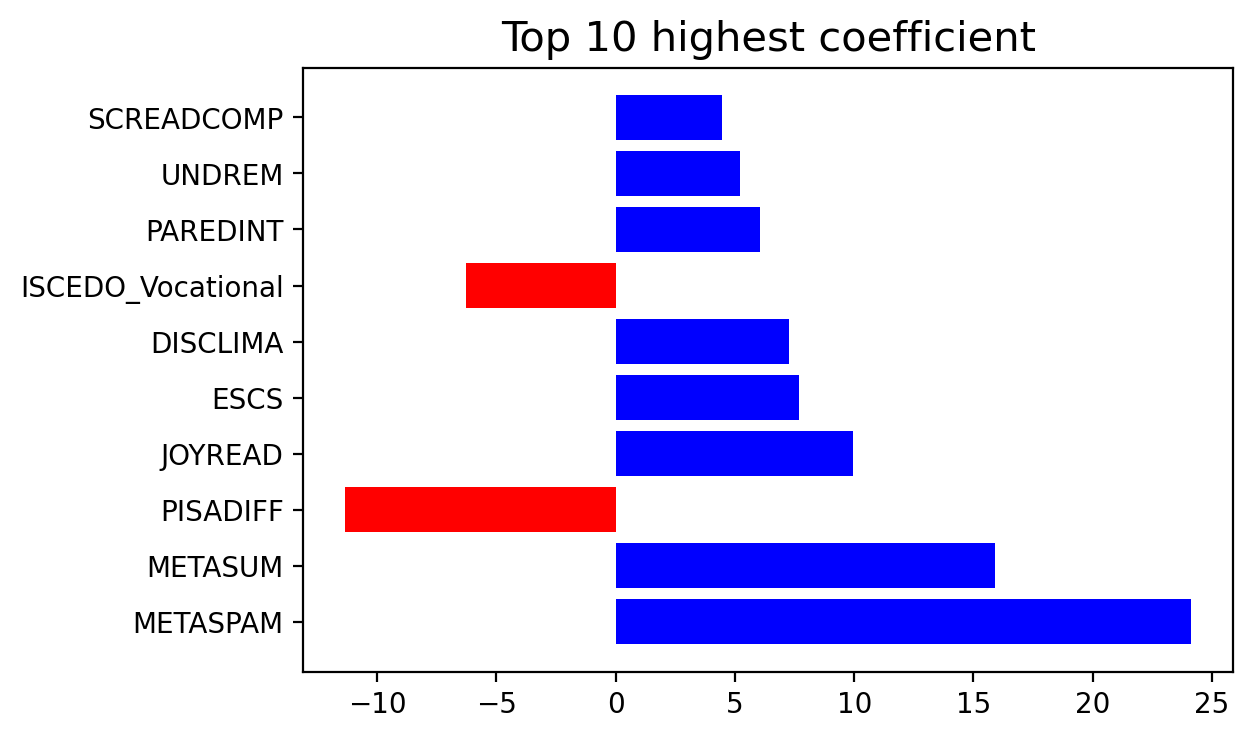

In [57]:
# Plot the coefficient of top 10 highest coefficient 
plt.figure(dpi=200)
plt.barh(lr_coef.loc[['METASPAM', 'METASUM', 'PISADIFF', 'JOYREAD', 'ESCS', 'DISCLIMA',
       'ISCEDO_Vocational', 'PAREDINT', 'UNDREM', 'SCREADCOMP']].index,
         lr_coef.loc[['METASPAM', 'METASUM', 'PISADIFF', 'JOYREAD', 'ESCS', 'DISCLIMA',
       'ISCEDO_Vocational', 'PAREDINT', 'UNDREM', 'SCREADCOMP']][0],
         color=lr_coef.loc[['METASPAM', 'METASUM', 'PISADIFF', 'JOYREAD', 'ESCS', 'DISCLIMA',
       'ISCEDO_Vocational', 'PAREDINT', 'UNDREM', 'SCREADCOMP']]['color'])
plt.title('Top 10 highest coefficient',size=15)

In [58]:
#RandomForestRegressor
RFReg = RandomForestRegressor(max_depth = 4, random_state = 0).fit(X_train, y_train)
# Train Score
RFReg.score(X_train, y_train)
print(f'RFReg Train R-squared Score: {RFReg.score(X_train, y_train)}')
print()

# Test Score
RFReg.score(X_test, y_test)
print(f'RFReg Test R-squared Score: {RFReg.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(RFReg, X_train, y_train, cv =5)
print(f'RFReg Cross Val Score :{cross_val_score(RFReg, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = RFReg.predict(X_test)

#evaluate models with matrics
print(f'RFReg MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RFReg RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

RFReg Train R-squared Score: 0.48641702510877394

RFReg Test R-squared Score: 0.49442076347254915
RFReg Cross Val Score :[0.44286026 0.45899286 0.4367311  0.49047013 0.4383631 ]

RFReg MSE is : 3657.030984650097
RFReg RMSE is : 60.47339071567012


In [59]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [2,3,4],
}
regr = RandomForestRegressor(random_state=42)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [60]:
clf.best_params_

{'max_depth': 4, 'n_estimators': 250}

In [61]:
clf.score(X_train, y_train)

0.4854263316894688

In [62]:
# Making prediction
y_preds_clf = clf.predict(X_test)

#evaluate models with matrics
print(f'RFReg MSE is : {mean_squared_error(y_test, y_preds_clf)}' )
print(f'RFReg RMSE is : {mean_squared_error(y_test, y_preds_clf, squared = False)}' )

RFReg MSE is : 3649.1107186765703
RFReg RMSE is : 60.40786967503961


In [63]:
clf.best_estimator_

RandomForestRegressor(max_depth=4, n_estimators=250, random_state=42)

In [64]:
pd.DataFrame(clf.cv_results_).sort_values('rank_test_score').head(5)[['params','param_max_depth','mean_test_score']]

params param_max_depth  mean_test_score
13  {'max_depth': 4, 'n_estimators': 250}               4         0.453373
14  {'max_depth': 4, 'n_estimators': 300}               4         0.453338
12  {'max_depth': 4, 'n_estimators': 200}               4         0.453135
11  {'max_depth': 4, 'n_estimators': 150}               4         0.453106
10  {'max_depth': 4, 'n_estimators': 100}               4         0.452363

In [65]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

#SVM
SVM = svm.SVR().fit(X_train_sc, y_train)
# Train Score
SVM.score(X_train_sc, y_train)
print(f'SVM Train R-squared Score: {SVM.score(X_train_sc, y_train)}')
print()

# Test Score
SVM.score(X_test_sc, y_test)
print(f'SVM Test R-squared Score: {SVM.score(X_test_sc, y_test)}')

# Cross Val Score
cross_val_score(SVM, X_train_sc, y_train, cv =5)
print(f'SVM Cross Val Score :{cross_val_score(SVM, X_train_sc, y_train, cv =5)}')
print()
# Making prediction
y_preds = SVM.predict(X_test_sc)

#evaluate SVMs with matrics
print(f'SVM MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'SVM RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

SVM Train R-squared Score: 0.46434991746820864

SVM Test R-squared Score: 0.4837213527084032
SVM Cross Val Score :[0.43855128 0.43231553 0.45406477 0.44682098 0.44590713]

SVM MSE is : 3734.423555102021
SVM RMSE is : 61.10993008588719


In [66]:
#scaler = StandardScaler()

#X_train_sc = scaler.fit_transform(X_train)

#X_test_sc = scaler.transform(X_test)

#XGRegressor
XGReg = xg.XGBRegressor(objective ='reg:squarederror', max_depth = 3, seed = 1,verbosity=0).fit(X_train, y_train) 
# Train Score
XGReg.score(X_train, y_train)
print(f'XGReg Train R-squared Score: {XGReg.score(X_train, y_train)}')
print()

# Test Score
XGReg.score(X_test, y_test)
print(f'XGReg Test R-squared Score: {XGReg.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(XGReg, X_train, y_train, cv =5)
print(f'XGReg Cross Val Score :{cross_val_score(XGReg, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = XGReg.predict(X_test)

#evaluate models with matrics
print(f'XGReg MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'XGReg RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

XGReg Train R-squared Score: 0.6660242465121711

XGReg Test R-squared Score: 0.5520855889736749
XGReg Cross Val Score :[0.49855046 0.52832261 0.48006804 0.55753924 0.52586273]

XGReg MSE is : 3239.9211859358697
XGReg RMSE is : 56.92030556783642


In [67]:
#scaling 
#XGReg Train R-squared Score: 0.8062091261552633

#XGReg Test R-squared Score: 0.7036807027713595
#XGReg Cross Val Score :[0.71167068 0.73181853 0.70530674 0.72293502 0.73317806]

#XGReg MSE is : 2121.8446899941187
#XGReg RMSE is : 46.063485430372275

In [68]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [2,3,4,5],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[11:38:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[11:38:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.5295131752300297
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [69]:
pd.DataFrame(xgb_grid.cv_results_).sort_values('rank_test_score').head(5)[['params','param_max_depth','mean_test_score']]

params param_max_depth  \
1  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               3   
2  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               4   
4  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               2   
0  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               2   
5  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               3   

   mean_test_score  
1         0.529513  
2         0.528034  
4         0.527742  
0         0.526698  
5         0.526387

In [70]:
#XGRegressor
XGReg2 = xg.XGBRegressor(learning_rate = 0.03, max_depth = 4, min_child_weight = 4, n_estimators = 500, nthread = 4, \
                         objective = 'reg:linear', subsample = 0.7, seed = 1, verbosity=0).fit(X_train, y_train) 
# Train Score
XGReg2.score(X_train, y_train)
print(f'XGReg2 Train R-squared Score: {XGReg2.score(X_train, y_train)}')
print()

# Test Score
XGReg2.score(X_test, y_test)
print(f'XGReg2 Test R-squared Score: {XGReg2.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(XGReg2, X_train, y_train, cv =5)
print(f'XGReg2 Cross Val Score :{cross_val_score(XGReg2, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = XGReg2.predict(X_test)

#evaluate models with matrics
print(f'XGReg2 MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'XGReg2 RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}')

XGReg2 Train R-squared Score: 0.6951541064019144

XGReg2 Test R-squared Score: 0.571462827709793
XGReg2 Cross Val Score :[0.51905969 0.53703354 0.50625278 0.57694237 0.54645926]

XGReg2 MSE is : 3099.758858579101
XGReg2 RMSE is : 55.675478072299484


100%|===================| 4858/4878 [00:36<00:00]        

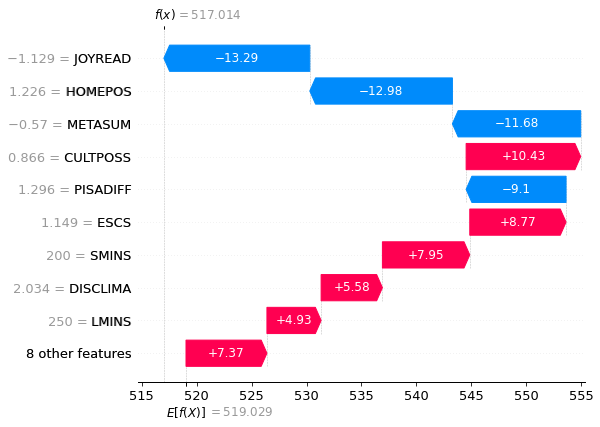

In [71]:
explainer = shap.Explainer(XGReg2, X_train)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[100])

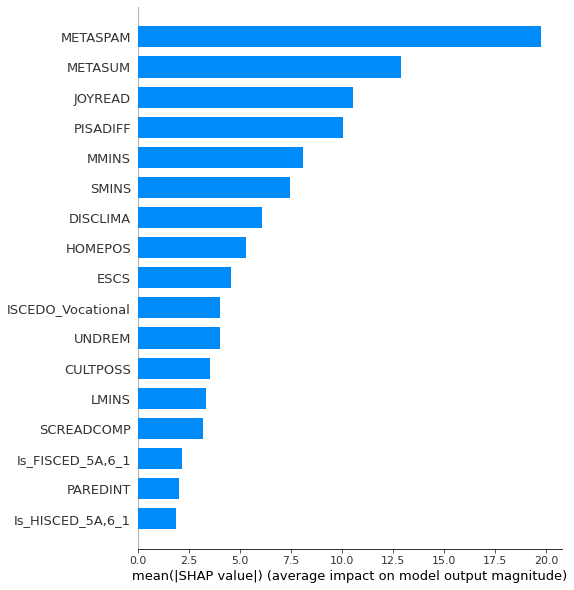

In [72]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

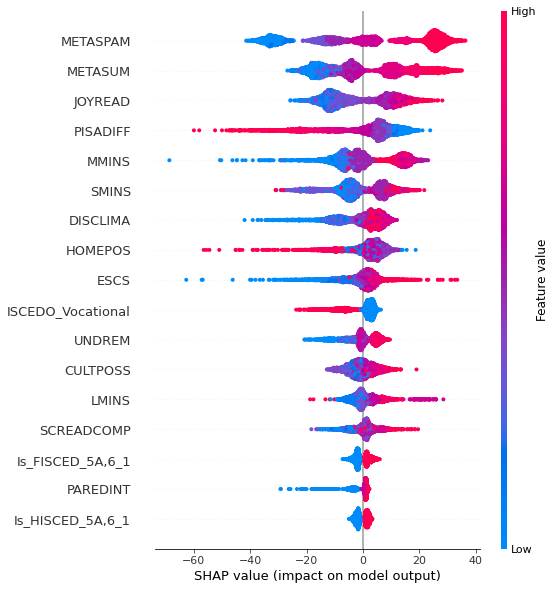

In [73]:
shap.summary_plot(shap_values, X_train)

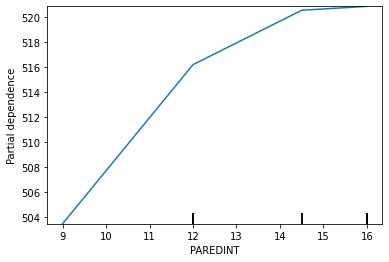

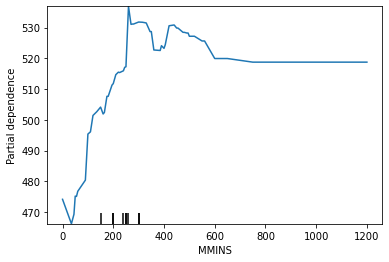

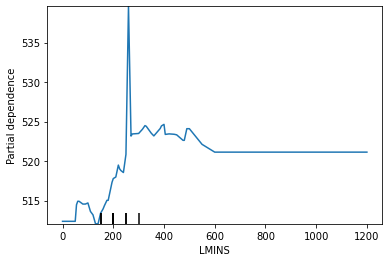

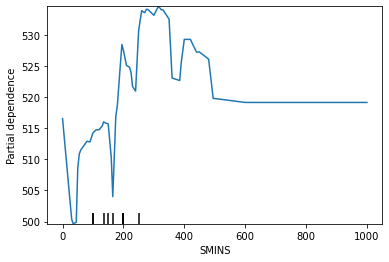

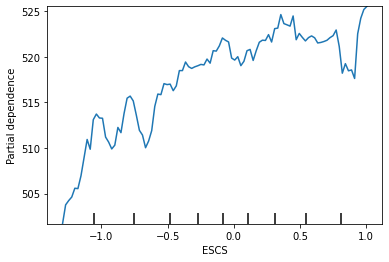

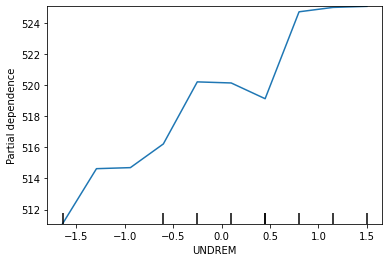

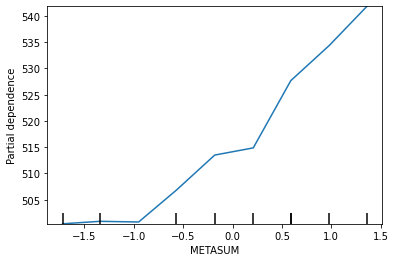

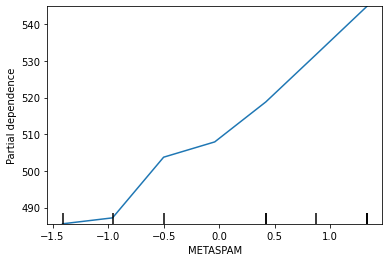

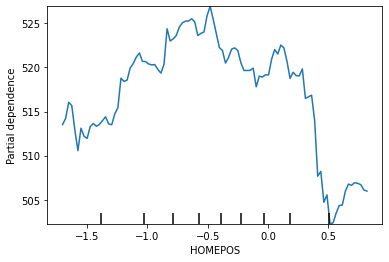

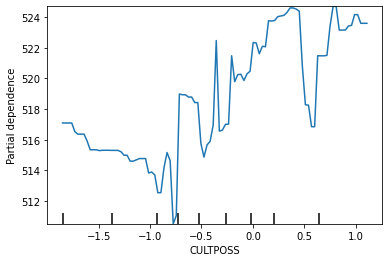

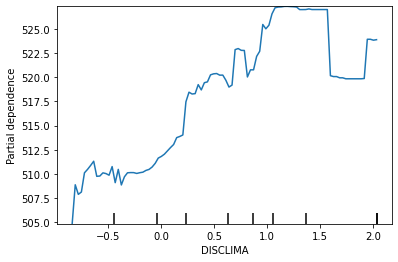

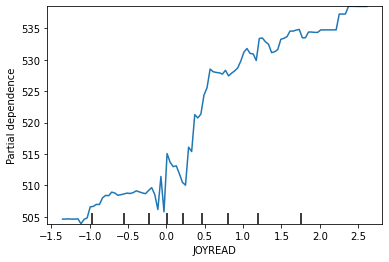

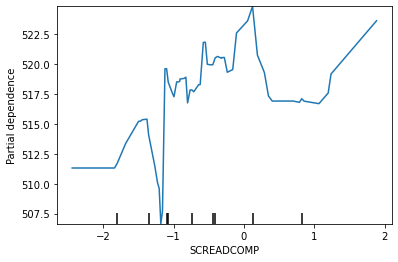

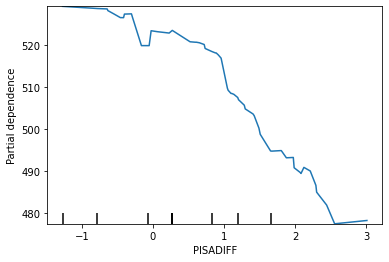

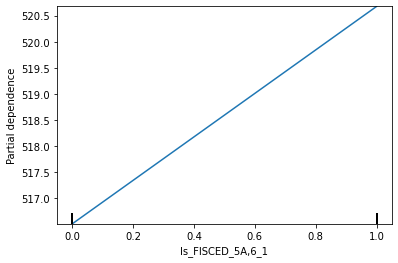

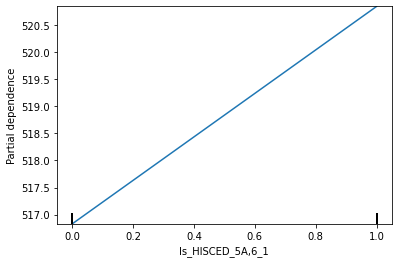

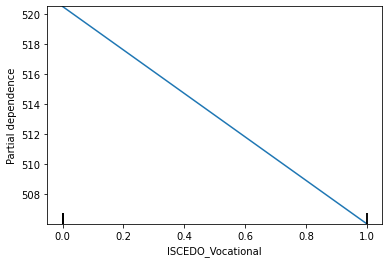

In [80]:
from sklearn.inspection import PartialDependenceDisplay
for cols_name in X_train.columns:
    PartialDependenceDisplay.from_estimator(XGReg2, X_train, [cols_name]);

In [74]:

#interpretml 
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression
from interpret.perf import RegressionPerf

In [75]:
lg = LinearRegression(random_state=42)
lg.fit(X_train, y_train)

lg_global = lg.explain_global()
show(lg_global)


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`


<!-- http://127.0.0.1:7210/2392703450992/ -->

In [76]:
lg_perf = RegressionPerf(lg.predict).explain_perf(X_test, y_test, name='LinearRegression')
show(lg_perf)

<!-- http://127.0.0.1:7210/2392623767712/ -->

In [77]:
ebm = ExplainableBoostingRegressor(random_state=42, n_jobs=-1, feature_names = X_train.columns)
ebm.fit(X_train, y_train) 

ExplainableBoostingRegressor(feature_names=['PAREDINT', 'MMINS', 'LMINS',
                                            'SMINS', 'ESCS', 'UNDREM',
                                            'METASUM', 'METASPAM', 'HOMEPOS',
                                            'CULTPOSS', 'DISCLIMA', 'JOYREAD',
                                            'SCREADCOMP', 'PISADIFF',
                                            'Is_FISCED_5A,6_1',
                                            'Is_HISCED_5A,6_1',
                                            'ISCEDO_Vocational',
                                            'MMINS x ISCEDO_Vocational',
                                            'SMINS x ISCEDO_Vocational',
                                            'HOMEPOS x PISADIFF',
                                            'ESCS x ISCEDO_Vocational',
                                            'ESCS x PISADIFF...
                             feature_types=['continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'categorical', 'categorical',
                                            'categorical', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction'],
                             n_jobs=-1)

In [78]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7210/2392627294416/ -->

In [79]:
ebm_perf = RegressionPerf(ebm.predict).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

<!-- http://127.0.0.1:7210/2392665671568/ -->